<!-- \***\*============================GRAPH PREPROCESSING============================** -->


In [295]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight
# def preprocess_graph(G):
#     # assuming 'weight' is the name of the attribute for edge weights
#     return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

In [296]:
# from random import randint
# G = nx.Graph()

# # Read the file and create edges with random weights
# file_path = 'small_dataset.txt'  # Replace with the actual file path
# # edges = []
# with open(file_path, 'r') as file:
#     file_contents = file.readlines()
#     num_lines = len(file_contents)
#     print(f"Number of lines: {num_lines}")
#     for i, line in enumerate(file_contents):
#         node1, node2 = map(int, line.split())
#         weight = float(randint(1, 99)) + ((i+1) * (1 / (num_lines -1)))
#     # Ensure the weight is displayed with full precision
#         # print(f"Weight: {weight:.50f}")
#         # edges.append(Edge(node1, node2, weight))
#         G.add_edge(node1, node2, weight=weight)
        
        

# # Create a NetworkX graph and add edges
# # for edge in edges:
# #     G.add_edge(edge.u, edge.v, weight=edge.weight)
#     # print(f"Edge: {edge.u} - {edge.v}, Weight: {edge.weight:.1000f}")

# # Preprocess the graph
# D = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
# with open('D.pkl', 'wb') as f:
#     pickle.dump(D, f)

# # # Create a new figure with a larger size
# # plt.figure(figsize=(60, 60))

# # # Draw the graph using the spring_layout
# # pos = nx.spring_layout(G)
# # nx.draw(G, pos, with_labels=True, node_color="yellow", node_size=300, edge_color="gray")

# # # Draw edge labels
# # edge_labels = nx.get_edge_attributes(G, "weight")
# # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# # plt.show()

# with open('graph.pkl', 'wb') as f:
#     pickle.dump(G, f)

In [297]:
# Load G and D from the local files
with open('graph.pkl', 'rb') as f:
    G = pickle.load(f)
    

with open('D.pkl', 'rb') as f:
    D = pickle.load(f)
# with open('shortest_paths.pkl', 'rb') as f:
#     shortest_paths = pickle.load(f) 

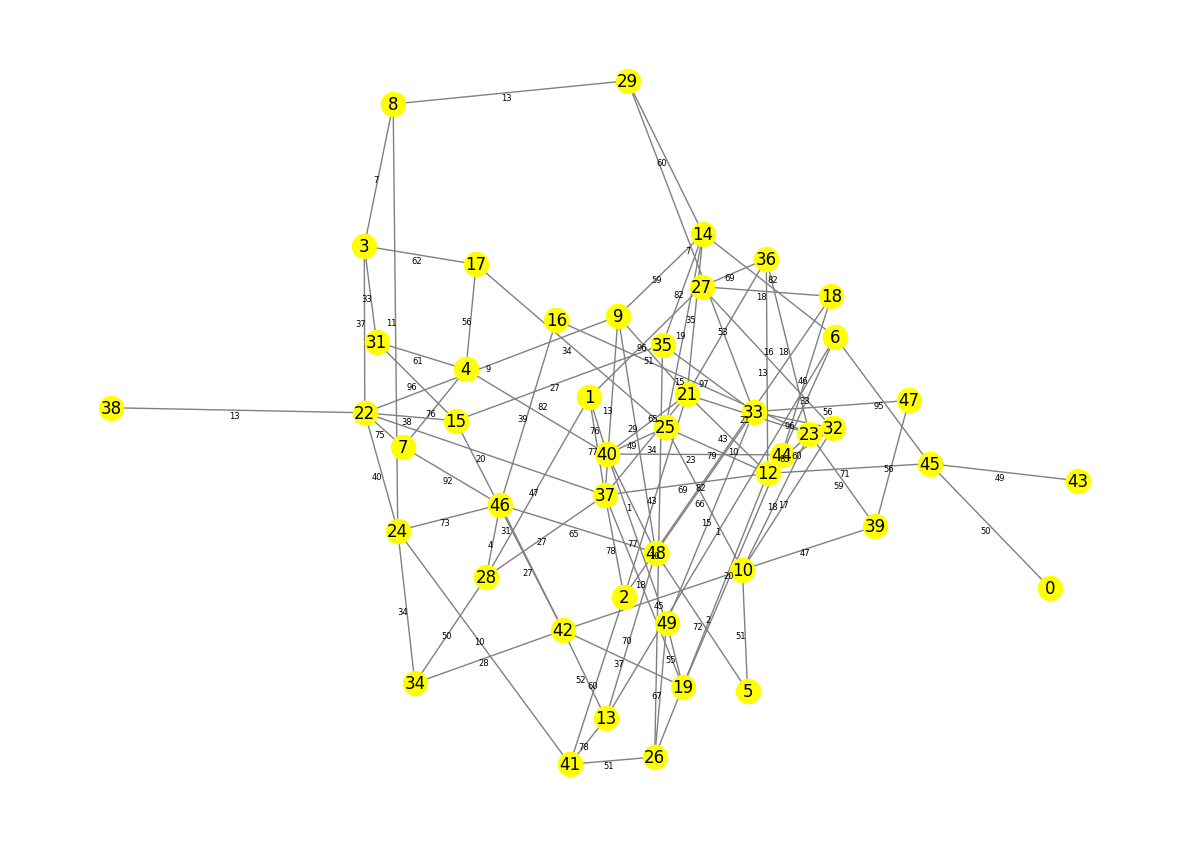

In [298]:
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Create a new figure with a larger size
plt.figure(figsize=(11.69, 8.27))

# Draw the graph using the spring_layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="yellow", node_size=300, edge_color="gray")

# Draw edge labels with integer weights
edge_labels = nx.get_edge_attributes(G, "weight")
int_edge_labels = {edge: int(weight) for edge, weight in edge_labels.items()}
edge_texts = []
for (n1, n2), label in int_edge_labels.items():
    x = (pos[n1][0] + pos[n2][0]) / 2
    y = (pos[n1][1] + pos[n2][1]) / 2
    edge_texts.append(plt.text(x, y, label, fontsize=6, ha='center', va='center'))

# Adjust the positions of the edge labels to avoid overlap
adjust_text(edge_texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.show()

<!-- =================================== Distance Oracle ===================================== -->


In [299]:
# class DistanceOracle:
#     def __init__(self,distances=None):
#         if distances is None:
#             self.data = {}
#         else:
#             self.data = distances
#     def get_distance(self, u, v):
#         return self.data.get(u, {}).get(v, float("inf"))
#     def __getitem__(self, key):
#         return self.data[key]
#     def add_distance(self, u, v, distance):
#         if u not in self.data:
#             self.data[u] = {}
#         self.data[u][v] = distance


In [300]:

# distance_oracle = DistanceOracle(D)

<!-- \*\*---------------------------------SHORTEST PATH function and Store------------------------------- -->


In [301]:
# import networkx as nx

# def store_shortest_paths(G):
#     # Use NetworkX's built-in function to compute all pairs shortest paths
#     all_pairs_paths = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))
    
#     # Flatten the dictionary to match the desired output format
#     shortest_paths = {}
#     for u, paths in all_pairs_paths.items():
#         for v, path in paths.items():
#             shortest_paths[(u, v)] = path
    
#     return shortest_paths

# # Example usage
# shortest_paths = store_shortest_paths(G)



In [302]:
# with open('shortest_paths.pkl', 'wb') as f:
#     pickle.dump(shortest_paths, f)

In [303]:
with open('shortest_paths.pkl', 'rb') as f:
    shortest_paths = pickle.load(f)

<!-- ---------------------------------POWER_OF_2 FUNCTION-------------------------------- -->


In [304]:
import math

def nearest_power_of_2(x):
    if x <= 0:
        return 0 # Return 1 for non-positive input
    elif math.isinf(x):
        return float("inf")  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

<!-- --------------------------------FIND_JUMP FUNCTION-------------------------------- -->


In [305]:
def FINDJUMP(P, F):
    X = []  # Initialize X with s
    x = P[0]
    X.append(x)
    # F = list(F)
    # vertices = [F.u , F.v]
   
    # if(nearest_power_of_2(
    #         D[x][F[0]]) > nearest_power_of_2(D[x][F[1]])):
    #         u = F[1]
    # else:
    #     u = F[0]
    
    
    u = min(F, key=lambda v: nearest_power_of_2(
        D[x][v]))
    
    # u = min(F, key=lambda v: nearest_power_of_2(
    #     distance_oracle.get_distance(x, v)))
    # print(u)
    while True:
        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        # distance = max(1, nearest_power_of_2(D[x][u]))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if D[x][vertex] >= max(1, nearest_power_of_2(D[x][u])):
                y = vertex
                break
        if y is not None:
            X.append(y)
            x = y
        else:
            break
    return X

<!-- **------------------------------MAXIMIZER FUNCTION--------------------------------
** -->


In [306]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v].get('weight', float('inf'))  # Provide a default value if 'weight' is missing
    else:
        return float('inf')

In [307]:

def maximizer(G, x, y, d1, d2):
    G = G.copy()
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None

    # Cache distance calculations
    # distance_cache = {}

    # def get_distance_cached(node1, node2):
    #     if (node1, node2) not in distance_cache:
    #         distance_cache[(node1, node2)] = distance_oracle.get_distance(node1, node2)
    #     return distance_cache[(node1, node2)]

    if nx.has_path(G, x, y):
        path = shortest_paths[(x, y)]
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edges_set.add((u, v))

    for u, v in edges_set:
        # if get_distance_cached(x, u) >= d1 and get_distance_cached(y, v) >= d2:
        #     max_edges.add((u, v))
        if (D[x][u] >= d1 and D[y][v] >= d2) :
        
            max_edges.add((u, v))   

    max_xy_distance = float('-inf')
    for u, v in max_edges:
        edge_data = G.get_edge_data(u, v)
        if G.has_edge(u, v):
            G.remove_edge(u, v)
        # D = preprocess_graph(G)
        # distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G, x, y):
            xy_path = nx.dijkstra_path(G, x, y, weight='weight')
            max_uv_distance = sum(
                get_edge_weight(G, xy_path[i], xy_path[i + 1])
                for i in range(len(xy_path) - 1)
            )
            if max_uv_distance > max_xy_distance:
                max_xy_edge = (u, v)
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance
        G.add_edge(u, v, **edge_data)   

    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        f = 1
        i_edge = 0
        i_end = None
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = round(D[u][v] , 7)
            
            
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            
            uv_distance_path = round(uv_distance_path, 7)
            if uv_distance < uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    i_end = max_xy_path[i + 2]
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
                    i_edge+=1
                    if i_edge == f:
                        break
                    
                    
        max_xy_path_new.append([i_end, max_xy_path[-1]])

        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new
    # return max_xy_edge, max_xy_path


In [308]:
maximizer(G , 15 , 2 , 64 , 0)

((21, 2), [[15, 22, 37, 2]])

<!-- ==============================MAXIMIZER Storage========================================= -->


In [309]:
def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in D.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance

In [310]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = [0]
i = nearest_power_of_2((max_d_value))


while i >= 1:
    d1_d2_list.append(i)
    i //= 2
# print(max_d_value)

In [311]:
# import networkx as nx
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import tqdm # Import tqdm to display a progress bar


# # Initialize a dictionary to store the maximizer output
# maximizer_dict = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer  # Replace 'maximizer' with the actual function name

# # Collect errors to print after the loop
# errors = []

# # Define a function to process a single pair of nodes
# def process_pair(G, x, y, d1, d2):
#     try:
#         result = maximizer_function(G, x, y, d1, d2)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, d1, d2), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, d1, d2), None

# # Use ThreadPoolExecutor to parallelize the computation
# with ThreadPoolExecutor() as executor:
#     futures = []
#     for x in G.nodes:
#         for y in G.nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         futures.append(executor.submit(process_pair, G, x, y, d1, d2))

#     for future in tqdm.tqdm(as_completed(futures), total=len(futures)):
#         key, result = future.result()
#         if result is not None:
#             maximizer_dict[key] = result
#         else:
#             errors.append(f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}.")

# # Print all errors after the loop
# for error in errors:
#     print(error)

# # print(maximizer_dict)

In [312]:
# with open('maximizer_dict.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict, f)
    

<!--  -->

In [313]:
# load maximizer_dict from the local file   
with open('maximizer_dict.pkl', 'rb') as f:
    maximizer_dict = pickle.load(f)

<!-- ===============================MAIN: QUERY FUNCTION==================================== -->


In [314]:
from numpy import short


def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i + 1]) for i in range(len(path) - 1)) and (
        len(path) < 2 or G.has_edge(path[-2], path[-1])
    )
def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result
def QUERY(G, s, t, e):
    if e == []:
        try:
            return shortest_paths[(s, t)]
        except KeyError:
            print(f"Shortest path for ({s}, {t}) not found in shortest_paths.")
            return []
        # return shortest_paths[(s, t)]
    # Check if the edge e is in the graph
    if isinstance(e, list):
        e.u, e.v = e
    if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
        # print("The edge to avoid is not in the graph.")
        return shortest_paths[(s, t)]
    # if distance_oracle.get_distance(s, e.u) > distance_oracle.get_distance(s, e.v):
    if D[s][e.u] > D[s][e.v]:
        e.u, e.v = e.v, e.u
        # print(f'correct edeges: {e.u}, {e.v}')
    # print(f"e.u={e.u}, e.v={e.v}")
    # Check if there is a valid path between s and t
    if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
        print("There is no valid path between the source and destination vertices.")
        return [], float("inf")
    # print(f"shortest_paths[(s,t)]={shortest_paths[(s, t)]}")
    JUMP_st = FINDJUMP(shortest_paths[(s, t)], [e.u, e.v])
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], [e.u, e.v])
    # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")
    final_shortest_path = []
    shortest_path_distance = float("inf")
    for x in JUMP_st:
        for y in JUMP_ts:
            if x == y:
                continue
            # print(f"x={x}, y={y}")

            d1 = nearest_power_of_2(D[x][e.u])

            d2 = nearest_power_of_2(D[y][e.v])
            # print(f"d1={d1}, d2={d2}")
            # e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
            e_star, xy_e_star = maximizer(G , x, y, d1, d2)
            
            
            # print(f"e_star={e_star}, xy_e_star={xy_e_star}")
            if xy_e_star is None:
                xy_e_star = []
            elif len(xy_e_star)> 2:
                # Flatten the list of lists
                xy_e_star = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])] + [xy_e_star[1][0]] + shortest_paths[(
                    # print(f"xy_e_star={xy_e_star}")
                    xy_e_star[2][0], xy_e_star[2][1])]
            else: 
                xy_e_star = xy_e_star[0]
            sx_path = shortest_paths[(s, x)]
            yt_path = shortest_paths[(y, t)]
            # print(f"sx_path={sx_path}, yt_path={yt_path}")
            # if sx_path is None or yt_path is None:
            #     continue  # Skip if there is no valid path from s to x or y to t
            if sx_path is None:
                sx_path = [x]
            if yt_path is None:
                yt_path = [y]
            
            p_distance = float("inf")
            P = sx_path + xy_e_star[1:-1] + yt_path
            # P = remove_duplicates(sx_path + xy_e_star + yt_path)
            
            if y==s and xy_e_star != []:
                P = xy_e_star[::-1] + shortest_paths[(x, t)]
                if x==t:
                    P = xy_e_star[::-1] 
            elif xy_e_star != [] and D[s][y] < D[x][s]:
                P = shortest_paths[(s, y)] + xy_e_star[::-1] + shortest_paths[(x, t)]
                if s in xy_e_star and xy_e_star.index(s) > 0:
                    s_index  = xy_e_star[::-1].index(s) 
                    p1 = xy_e_star[::-1][s_index:]    
                    p2 = shortest_paths[(x, t)]
                    P = p1 + p2
            P = remove_duplicates(P)
            
            # print(f"P={P}")
            if not is_valid_path(G, P):
                continue
            
            if is_valid_path(G, P):
                p_distance = sum(
                    get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
                )

            p_edges = [(P[i], P[i+1]) for i in range(len(P) - 1)]
            if ((e.u , e.v) not in p_edges and (e.v , e.u) not in p_edges ) and (p_distance < shortest_path_distance):
                    final_shortest_path = P
                    # print(f"shortest_path1={final_shortest_path}")
                    shortest_path_distance = p_distance
    return final_shortest_path

In [315]:
# shortest st path: [3, 31, 4, 17, 25, 10, 23]
# Source: 3, Destination: 23, Edge to avoid: 4-17
# [3, 31, 15, 35, 26, 12, 21, 23] 135.53535353535352
# QUERY time: 0.070837 seconds
# [3, 17, 25, 10, 23] 133.4141414141414
# Cross-check time: 0.002000 seconds

e = Edge(4 , 17 , get_edge_weight(G, 4, 17))
QUERY(G, 3, 23, e)

[3, 22, 37, 21, 23]

In [316]:
# shortest st path: [27, 1, 37, 9, 48, 33, 29]
# Source: 27, Destination: 29, Edge to avoid: 1-37
# [27, 32, 33, 29] 187.59595959595958
# QUERY time: 0.024626 seconds
# [27, 1, 28, 37, 9, 48, 33, 29] 175.35353535353536
# Cross-check time: 0.000999 seconds

e = Edge(1, 37 , get_edge_weight(G, 1, 37))
QUERY(G, 27, 29, e)

[27, 32, 33, 29]

In [317]:
# # G_copy = G.copy()   
def cross_check(G, s, t, e_u, e_v):
    G_copy = G.copy()
    edge_exists = G_copy.has_edge(e_u, e_v)
    if edge_exists:
        edge_data = G_copy.get_edge_data(e_u, e_v)
        G_copy.remove_edge(e_u, e_v)
        # print(f"Removed edge ({e_u}, {e_v}) from the graph.")
        
    if not nx.has_path(G_copy, s, t):
        # print("No path exists between the source and destination vertices.")
        return []

    st_path = nx.dijkstra_path(G_copy, s, t, weight='weight')
    
    
    if edge_exists:
        G_copy.add_edge(e_u, e_v, **edge_data)
        # print(f"Added edge ({e_u}, {e_v}) back to the graph.")



    return st_path

# # cross_check(G, 1, 435, 236, 122)

In [318]:
# shortest st path: [28, 37, 9, 48, 33, 29]
# Source: 28, Destination: 29, Edge to avoid: 37-28
# [28, 1, 40, 25, 14, 29] 166.87878787878788
# QUERY time: 0.039830 seconds
# [28, 1, 37, 9, 48, 33, 29] 123.46464646464646
# Cross-check time: 0.004001 seconds


e = Edge(37 , 28 , get_edge_weight(G, 37, 28))
QUERY(G, 28, 29, e)

[28, 46, 24, 8, 29]

In [319]:
# shortest st path: [10, 23, 21, 9, 22, 38]
# Source: 10, Destination: 38, Edge to avoid: 23-10
# [10, 25, 17, 4, 31, 3, 22, 38] 262.24242424242425
# QUERY time: 0.042484 seconds
# [10, 39, 23, 21, 9, 22, 38] 250.13131313131314
# Cross-check time: 0.004320 seconds


e = Edge(23 , 10 , get_edge_weight(G, 23, 10)) 
QUERY(G, 10, 38, e) 

[10, 42, 15, 22, 38]

In [320]:
# shortest st path: [46, 28, 37, 9, 48, 33, 29]
# Source: 46, Destination: 29, Edge to avoid: 28-37
# [46, 48, 33, 29] 157.8080808080808
# QUERY time: 0.063249 seconds
# [46, 28, 1, 37, 9, 48, 33, 29] 150.32323232323233
# Cross-check time: 0.003942 seconds
# ***********************Paths do not match*****************************.


e= Edge(28 , 37 , get_edge_weight(G, 28, 37))
QUERY(G, 46, 29, e)

[46, 24, 8, 29]

In [321]:
# shortest st path: [39, 23, 21, 9, 22, 38]
# Source: 39, Destination: 38, Edge to avoid: 23-39
# [] 0
# QUERY time: 0.018255 seconds
# [39, 10, 23, 21, 9, 22, 38] 249.72727272727275
# Cross-check time: 0.002000 seconds
print(shortest_paths[(39, 38)])
e = Edge(23 , 39 , get_edge_weight(G, 23, 39))
QUERY(G, 39, 38, e)


[39, 23, 21, 37, 22, 38]


[39, 10, 23, 21, 37, 22, 38]

In [322]:
# shortest st path: [45, 0]
# Source: 45, Destination: 0, Edge to avoid: 45-0
# [0] 0
# QUERY time: 0.004446 seconds
# [] 0
# Cross-check time: 0.000994 seconds
e = Edge(45 , 0 , get_edge_weight(G, 45, 0))
QUERY(G, 45, 0, e)  

[]

In [324]:
# [27, 18, 44, 19, 37, 22, 3, 31]
# shortest st path: [16, 23, 21, 37, 22, 3, 31]
# Source: 16, Destination: 31, Edge to avoid: 21-37
# [16, 23, 36, 12, 26, 41, 24, 8, 3, 31] 164.1919191919192
# QUERY time: 0.063324 seconds
# [16, 46, 28, 37, 22, 3, 31] 163.25252525252526
# Cross-check time: 0.003230 seconds
# ***********************Paths do not match*****************************

e = Edge(21 , 37 , get_edge_weight(G, 21, 37))
QUERY(G, 16, 31, e)

[16, 46, 28, 37, 22, 3, 31]

In [323]:
# shortest st path: [27, 18, 2, 41, 24, 8, 3, 31]
# Source: 27, Destination: 31, Edge to avoid: 24-8
# [27, 18, 44, 19, 37, 22, 3, 31] 195.45454545454547
# QUERY time: 0.119916 seconds
# [27, 32, 33, 29, 8, 3, 31] 175.0808080


e = Edge(24 , 8 , get_edge_weight(G, 24, 8))
QUERY(G, 27, 31, e)


[27, 32, 33, 29, 8, 3, 31]

In [326]:
import random   
import time
from tqdm import tqdm   

def test_query(G, s, t, e_u, e_v):
    # print(f"shortest st path: {shortest_paths[(s, t)]}")    
    # print(f"Source: {s}, Destination: {t}, Edge to avoid: {e_u}-{e_v}")
    Q_time = time.time()
    P1 = QUERY(G , s, t, Edge(e_u, e_v, get_edge_weight(G, e_u, e_v)))
    wp1 = sum(get_edge_weight(G, P1[i], P1[i + 1]) for i in range(len(P1) - 1))
    Q_time = time.time() - Q_time
    
    C_time = time.time()
    P2 = cross_check(G, s, t, e_u, e_v)
    wp2 = sum(get_edge_weight(G, P2[i], P2[i + 1]) for i in range(len(P2) - 1))
    C_time = time.time() - C_time
    # print(P1 , wp1)
    # print(f"QUERY time: {Q_time:.6f} seconds")
    # print(P2 , wp2)
    # print(f"Cross-check time: {C_time:.6f} seconds")
    
    if P1 == P2:
    #    return print("Paths match.")
         return 
    
    else:
        print(f"shortest st path: {shortest_paths[(s, t)]}")    
        print(f"Source: {s}, Destination: {t}, Edge to avoid: {e_u}-{e_v}")
        print(P1 , wp1)
        print(f"QUERY time: {Q_time:.6f} seconds")
        print(P2 , wp2)
        print(f"Cross-check time: {C_time:.6f} seconds")
        return print("***********************Paths do not match*****************************.\n")
   
   

for i in range(200000):
    # print(f"Test {i+1}:")
    s = random.randint(0, 49)
    t = random.randint(0, 49)
    if s == t:
        t = (t + 1) % 50
    if (s, t) not in shortest_paths:
        continue
    e_u , e_v = random.sample(shortest_paths[(s, t)], 2)
    test_query(G, s, t, e_u, e_v)
    # print("=============================================================\n")


<!-- #**-----------------2-fault distance oracle----------------** -->


<!-- ##Basic Function -->


In [310]:
# f = 2

In [311]:



def edge_in_path(p, F2):
    if len(p) < 2:
        return False
    p_edges = [(p[i], p[i+ 1]) for i in range(len(p) - 1)]
    for edge in F2:
        if (edge.u ,edge.v) in p_edges or (edge.v , edge.u) in p_edges:
            return True
    return False
def bfs_tree_of_S_rooted_x(graph, s, x):
    # Generate BFS tree rooted at x
    bfs_tree_s = nx.bfs_tree(graph, s)
    # Check if u is in the BFS tree rooted at x
    if x in bfs_tree_s.nodes:
        # BFS tree roted at u from the BFS tree rooted at x
        bfs_tree_x = nx.bfs_tree(bfs_tree_s, x)
        bfs_tree_nodes = list(bfs_tree_x.nodes)
        return bfs_tree_nodes
    else:
        # print(f"Node {x} is not in the BFS tree rooted at {s}")
        return None
def intact_from_failure_path(path, F):
    if path is None:
        return False

    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

    if len(F) == 0:
        return True

    if isinstance(F, list) and len(F) == 2 and all(isinstance(x, int) for x in F):
        if (F[0], F[1]) in path_edges or (F[1], F[0]) in path_edges:
            return False
        return True

    for edge in F:
        if isinstance(edge, tuple):
            if (edge[0], edge[1]) in path_edges or (edge[1], edge[0]) in path_edges:
                return False
        elif isinstance(edge, list):
            if (edge[0], edge[1]) in path_edges or (edge[1], edge[0]) in path_edges:
                return False
        elif hasattr(edge, 'u') and hasattr(edge, 'v'):
            if (edge.u, edge.v) in path_edges or (edge.v, edge.u) in path_edges:
                return False
        else:
            print(f"Unexpected edge type: {type(edge)}")
            return False

    return True
def intact_from_failure_tree(T, F):
    # Check if F is empty
    if T is None:
        # print("bfs_tree_of_S_rooted_x returned None")
        return True
    if not F:
        return True
    
    if isinstance(F, list) and len(F) == 2 and all(isinstance(x, int) for x in F):
        if F[0] in T or F[1] in T:
            return False
        return True

    # Check if any vertex in F is in the tree T
    for edge in F:
        # Unpack edge into u and v
        if isinstance(edge, Edge):
            u, v = edge.u, edge.v
        elif isinstance(edge, tuple) or isinstance(edge, list):
            u, v = edge
        else:
            print(f"Unexpected edge type: {type(edge)}")
            return False

        if u in T or v in T:
            return False

    return True
def single_edge_in_path(p, F2):
    if F2 is None or F2 == []:
        return False
    if p is not None:
        p_edges = [(p[i], p[i + 1]) for i in range(len(p) - 1)]
        
        for edge in F2:
            # unpack edge into u and v
            if isinstance(edge, Edge):
                u, v = edge.u, edge.v
            else:
                u,v = edge
            # check if the edge is in the path
            if (u, v) in p_edges or (v, u) in p_edges:
                return True
            
        return False

In [312]:

# F2 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(2, 5, get_edge_weight(G, 2, 5))]
# edge_in_path([2,5], F2)
# F3 = [Edge(1, 3, get_edge_weight(G, 1, 3)), Edge(17, 9, get_edge_weight(G, 17, 9))]

# print(single_edge_in_path([3, 1, 2, 4,9], F3))

<!-- #Maximizer Functions -->


In [313]:
# # load all maximizer_dict
# with open('maximizer_dict1.pkl', 'rb') as f:
#     maximizer_dict1 = pickle.load(f)
# with open('maximizer_dict21.pkl', 'rb') as f:
#     maximizer_dict21 = pickle.load(f)
# with open('maximizer_dict2.pkl', 'rb') as f:
#     maximizer_dict2 = pickle.load(f)
# with open('maximizer_dict3.pkl', 'rb') as f:
#     maximizer_dict3 = pickle.load(f)

In [314]:
# shortest_paths[(36 ,21)]
# G.edges


In [315]:
def maximizer1(G, x, y, d1, d2):
    G = G.copy()
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None

    if nx.has_path(G, x, y):
        path = shortest_paths[(x, y)]
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)

    for u, v in edges_set:
        max_edge1 = (u, v)
        max_edges.add(max_edge1)
    max_edges = list(max_edges)

    if not max_edges:
        return [], []

    for eu, ev in max_edges:
        if not G.has_edge(eu, ev):
            continue

        edge1_data = G.get_edge_data(eu, ev)
        path1 = QUERY(G, x, y, Edge(eu, ev, get_edge_weight(G, eu, ev)))
        p1_edges = [(path1[i], path1[i + 1]) for i in range(len(path1) - 1)]

        for eu1, ev1 in p1_edges:
            if (
                (D[x][eu1] >= d1 or D[x][ev1] >= d1 or D[x][eu] >= d1 or D[x][ev] >= d1)
                and (D[y][eu1] >= d2 or D[y][ev1] >= d2 or D[y][eu] >= d2 or D[y][ev] >= d2)
            ):
                if G.has_edge(eu, ev):
                    G.remove_edge(eu, ev)
                if not nx.has_path(G, x, y):
                    G.add_edge(eu, ev, **edge1_data)
                    break

                edge2_data = G.get_edge_data(eu1, ev1)
                G.remove_edge(eu1, ev1)
                if not nx.has_path(G, x, y):
                    G.add_edge(eu1, ev1, **edge2_data)
                    continue

                path2 = nx.dijkstra_path(G, x, y, weight="weight")
                path2_distance = sum(
                    get_edge_weight(G, path2[i], path2[i + 1]) for i in range(len(path2) - 1)
                )
                if path2_distance > max_xy_distance:
                    max_xy_edge = [(eu, ev), (eu1, ev1)]
                    max_xy_path = path2
                    max_xy_distance = path2_distance
                G.add_edge(eu1, ev1, **edge2_data)

        G.add_edge(eu, ev, **edge1_data)

    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = D[u][v]
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]
        if len(max_xy_path_new) == 3:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new

In [316]:
maximizer1(G , 23 , 5 , 0 , 0)

([(10, 5), (40, 48)], [[23, 16, 46, 48, 5]])

In [317]:
# def maximizer1(G, x, y, d1, d2):
#     max_edges = set()
#     edges_set = set()
#     max_xy_edge = None
#     max_xy_path = None
#     max_xy_distance = float("-inf")
#     max_xy_path_new = None

#     removed_edges = []
#     added_edges = []

#     if nx.has_path(G, x, y):
#         path = nx.shortest_path(G, x, y, weight='weight')
#         for i in range(len(path) - 1):
#             u = path[i]
#             v = path[i + 1]
#             edge = (u, v)
#             edges_set.add(edge)

#     for u, v in edges_set:
#         if (
#             nx.has_path(G, x, u)
#             and nx.has_path(G, y, v)
#             and (
#                 distance_oracle.get_distance(x, u) >= d1
#                 and distance_oracle.get_distance(y, v) >= d2
#             )
#         ):
#             max_edge1 = (u, v)
#             max_edges.add(max_edge1)
#     max_edges = list(max_edges)

#     if not max_edges:
#         return [], [nx.shortest_path(G, x, y, weight='weight')]

#     for eu, ev in max_edges:
#         if not G.has_edge(eu, ev):
#             continue

#         edge1_data = G.get_edge_data(eu, ev)
#         path1 = QUERY(G, x, y, Edge(eu, ev, get_edge_weight(G, eu, ev)))
#         if path1 is None:
#             continue
#         p1_edges = [(path1[i], path1[i + 1]) for i in range(len(path1) - 1)]

#         G.remove_edge(eu, ev)
#         removed_edges.append((eu, ev))
#         # print(f"removed edge: {eu, ev}")

#         distance_oracle_new = DistanceOracle(preprocess_graph(G))
#         for eu1, ev1 in p1_edges:
#             if (
#                 distance_oracle_new.get_distance(x, eu1) >= d1
#                 and distance_oracle_new.get_distance(y, ev1) >= d2
#             ):
#                 edge2_data = G.get_edge_data(eu1, ev1)
#                 G.remove_edge(eu1, ev1)
#                 removed_edges.append((eu1, ev1))
#                 # print(f"removed edge: {eu1, ev1}")
#                 if not nx.has_path(G, x, y):
#                     G.add_edge(eu1, ev1, **edge2_data)
#                     added_edges.append((eu1, ev1))
#                     # print(f"added edge: {eu1, ev1}")
#                     continue
#                 path2 = nx.dijkstra_path(G, x, y, weight="weight")
#                 path2_distance = sum(
#                     get_edge_weight(G, path2[i], path2[i + 1]) for i in range(len(path2) - 1)
#                 )
#                 if path2_distance > max_xy_distance:
#                     max_xy_edge = [(eu, ev), (eu1, ev1)]
#                     max_xy_path = path2
#                     max_xy_distance = path2_distance
#                 G.add_edge(eu1, ev1, **edge2_data)
#                 added_edges.append((eu1, ev1))
#                 # print(f"added edge: {eu1, ev1}")

#         G.add_edge(eu, ev, **edge1_data)
#         added_edges.append((eu, ev))
#         # print(f"added edge: {eu, ev}")

#     if max_xy_path is not None:
#         s = 0
#         max_xy_path_new = []
#         for i in range(len(max_xy_path) - 1):
#             u = max_xy_path[s]
#             v = max_xy_path[i + 1]
#             uv_distance = distance_oracle.get_distance(u, v)
#             uv_distance_path = sum(
#                 get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
#                 for j in range(s, i + 1)
#             )
#             if uv_distance != uv_distance_path:
#                 if i < (len(max_xy_path) - 2):
#                     s_to_a_path = [u]
#                     intermediate_edge = (v, max_xy_path[i + 2])
#                     s_to_a_path.append(max_xy_path[i])
#                     max_xy_path_new.append(s_to_a_path)
#                     max_xy_path_new.append(intermediate_edge)
#                     s = i + 2
#         max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
#         if len(max_xy_path_new) == 1:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#         if len(max_xy_path_new) == 3:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)

#     # Compare removed and added edges
#     missing_edges = set(removed_edges) - set(added_edges)
#     if missing_edges:
#         print(f"Missing edges: {missing_edges}")

#     return max_xy_edge, max_xy_path_new

In [318]:
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import networkx as nx
# import threading

# # Initialize a dictionary to store the maximizer output
# maximizer_dict1 = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer1  # Replace 'maximizer1' with the actual function name

# # Collect errors to print after the loop
# errors = []

# # Locks for thread-safe access to shared resources
# graph_lock = threading.Lock()
# dict_lock = threading.Lock()

# # Define a function to process a single pair of nodes
# def process_pair(G, x, y, d1, d2):
#     try:
#         with graph_lock:
#             result = maximizer_function(G, x, y, d1, d2)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, d1, d2), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, d1, d2), None
#     except Exception as e:
#         return (x, y, d1, d2), f"Error: {str(e)}"

# # Use ThreadPoolExecutor to parallelize the computation
# with ThreadPoolExecutor() as executor:
#     futures = []
#     for x in list(G.nodes):  # Convert to list to avoid modification during iteration
#         for y in list(G.nodes):  # Convert to list to avoid modification during iteration
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         futures.append(executor.submit(process_pair, G, x, y, d1, d2))

#     for future in as_completed(futures):
#         key, result = future.result()
#         with dict_lock:
#             if isinstance(result, str):
#                 errors.append(f"Error for {key}: {result}")
#             elif result is not None:
#                 maximizer_dict1[key] = result
#             else:
#                 errors.append(f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}.")

# # Print all errors after the loop
# for error in errors:
#     print(error)

# # Optionally print the results
# # print(maximizer_dict1)

In [319]:
# print(maximizer_dict1[(23, 21, 0, 0)])


In [320]:
# with open('maximizer_dict1.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict1, f) 

In [321]:
# with open('maximizer_dict1.pkl', 'rb') as f:
#     maximizer_dict1 = pickle.load(f)


In [322]:
# maximizer_dict1[(4, 44, 8, 8)]

In [323]:

# from itertools import combinations


# def maximizer1(G, x, y, d1, d2) :
#     max_edges = set()
#     edges_set = set()
#     max_xy_edge = None
#     max_xy_path = None
#     max_xy_distance = float("-inf")
#     max_xy_path_new = None
#     # xy_distance = distance_oracle.get_distance(x, y)
#     # make the set of edges in xy path
#     if nx.has_path(G, x, y):
#         # Get the path and its length
#         path = shortest_paths[(x, y)]
#         # print(path)
#         for i in range(len(path) - 1):
#             u = path[i]
#             v = path[i + 1]
#             edge = (u, v)
#             edges_set.add(edge)
#     # print(edges_set)
#     # check max edges in edge list
    
#     max_edges2Avoid = []
#     for e in G.edges:
#         if distance_oracle.get_distance(x, e[0]) >= d1 and distance_oracle.get_distance(y, e[1]) >= d2:
#             max_edges2Avoid.append(e)


#     for edge_combination in combinations(max_edges2Avoid, 2):
#         # Check if all edges in the combination exist in the graph
#         if not all(G.has_edge(eu, ev) for eu, ev in edge_combination):
#             continue

#         # Store edge data and remove edges
#         edge_data = [(eu, ev, G.get_edge_data(eu, ev)) for eu, ev in edge_combination]
#         for eu, ev, _ in edge_data:
#             G.remove_edge(eu, ev)
#             # print(f"Removed edge: ({eu}, {ev})")
#                 # Check if there is still a path from x to y
#         if not nx.has_path(G, x, y):
#             # Restore edges and continue
#             for eu, ev, data in edge_data:
#                 G.add_edge(eu, ev, **data)
#                 # print(f"Restored edge: ({eu}, {ev})")
#             continue

#         # Use QUERY function to find path avoiding f edges
#         path = nx.dijkstra_path(G, x, y, weight="weight")
#         if not path or path == float("inf"):
#             # Restore edges and continue
#             for eu, ev, data in edge_data:
#                 G.add_edge(eu, ev, **data)
#                 # print(f"Restored edge: ({eu}, {ev})")
#             continue

#         # Find the path and its distance
#         path_distance = sum(get_edge_weight(G, path[j], path[j + 1]) for j in range(len(path) - 1))

#         # Check if the path satisfies the conditions
        
#         if path_distance > max_xy_distance:
#             max_xy_edge = edge_combination
#             max_xy_path = path
#             max_xy_distance = path_distance

#         # Restore edges
#         for eu, ev, data in edge_data:
#             G.add_edge(eu, ev, **data)
#             # print(f"Restored edge: ({eu}, {ev})")
    
  
    
    
    
       
        

                
        

   
#     # for i in range(len(max_edges)):
#     #     for j in range(i + 1, len(max_edges)):
#     #         max_edges_2.append((max_edges[i], max_edges[j]))
#     # # print(max_edges_2)

#     # # G_copy = G.copy()
#     # # if isinstance(max_edges_2[0], int):
#     # #     # max_xy_distance = float("-inf")
#     # #     if G_copy.has_edge(max_edges_2[0], max_edges_2[1]):
#     # #         G_copy.remove_edge(max_edges_2[0], max_edges_2[1])
#     # #         # Calculate the xy path distance
#     # #     D = preprocess_graph(G_copy)
#     # #     distance_oracle_new = DistanceOracle(D)
#     # #     if nx.has_path(G_copy, x, y):
#     # #         xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
#     # #         # print(xy_path)
#     # #         max_uv_distance = distance_oracle_new.get_distance(x, y)
#     # #         # print(f"max_uv_distance:{max_uv_distance}")
#     # #         if max_uv_distance > max_xy_distance:
#     # #             max_xy_edge = [max_edges_2[0], max_edges_2[1]]
#     # #             max_xy_path = xy_path
#     # #             max_xy_distance = max_uv_distance

#     # # else:
    
#     # # print(f"max_edges_2:{max_edges_2}")
#     # # G_copy = G.copy()
#     # for e1 in max_edges_2:
#     #     # G_copy = G.copy()
#     #     # # print(f"e:{e1 , e2}")
#     #     # # max_xy_distance = float("-inf")

  
#     #     if G.has_edge(e1[0][0], e1[0][1]) and G.has_edge(e1[1][0], e1[1][1]):
#     #         edge1_data = G.get_edge_data(e1[0][0], e1[0][1])
#     #         edge2_data = G.get_edge_data(e1[1][0], e1[1][1])  
#     #         G.remove_edge(e1[0][0], e1[0][1])
#     #         G.remove_edge(e1[1][0], e1[1][1])

#     #         # Calculate the xy path distance
#     #         D = preprocess_graph(G)
#     #         distance_oracle_new = DistanceOracle(D)
#     #         if nx.has_path(G, x, y):
#     #             xy_path = nx.dijkstra_path(G, x, y, weight="weight")
#     #             # print(xy_path)
#     #             max_uv_distance = distance_oracle_new.get_distance(x, y)
#     #             # print(f"max_uv_distance:{max_uv_distance}")
#     #             if max_uv_distance > max_xy_distance:
#     #                 max_xy_edge = (e1[0], e1[1])
#     #                 max_xy_path = xy_path
#     #                 max_xy_distance = max_uv_distance
#     #         G.add_edge(e1[0][0], e1[0][1], **edge1_data)
#     #         G.add_edge(e1[1][0], e1[1][1], **edge2_data)



#     # chandge max_xy_path to 3D-composable form
#     # print((max_xy_edge, max_xy_path))
#     if max_xy_path is not None:
#         s = 0
#         max_xy_path_new = []
#         for i in range(len(max_xy_path) - 1):
#             u = max_xy_path[s]
#             v = max_xy_path[i + 1]
#             uv_distance = distance_oracle.get_distance(u, v)
#             uv_distance_path = sum(
#                 get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
#                 for j in range(s, i + 1)
#             )
#             # print(f"uv_distance:{uv_distance}")
#             # print(f"uv_distance_path:{uv_distance_path}")
#             # s_to_a_path = [u]
#             if uv_distance != uv_distance_path:
#                 if i < (len(max_xy_path) - 2):
#                     s_to_a_path = [u]
#                     intermediate_edge = (v, max_xy_path[i + 2])
#                     # print(f"intermediate:{intermediate_edge}")
#                     # print(f"i:{i}")
#                     s_to_a_path.append(max_xy_path[i])
#                     max_xy_path_new.append(s_to_a_path)
#                     max_xy_path_new.append(intermediate_edge)
#                     s = i + 2
#         max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
#         if len(max_xy_path_new) == 1:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#         if len(max_xy_path_new) == 3:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#     return max_xy_edge, max_xy_path_new

# maximizer1(G, 23, 21, 0, 0) 

In [324]:
# # maximizer1(G, 6, 35, 0, 32)
# # print(maximizer_dict1[(6, 35, 0, 32)])
# maximizer1(G ,45,17, 8, 64)



In [325]:
# maximizer1(G , 36 , 21 ,0 ,0)

In [326]:
# def maximizer21(x, y, d1, V, F_star):
#     max_edges = set()
#     edges_set = set()
#     max_xy_edge = None
#     max_xy_path = None
#     max_xy_distance = float("-inf")
#     max_xy_path_new = None

#     removed_edges = []
#     added_edges = []

#     if nx.has_path(G, x, y):
#         path = shortest_paths[(x, y)]
#         for i in range(len(path) - 1):
#             u = path[i]
#             v = path[i + 1]
#             edge = (u, v)
#             edges_set.add(edge)

#     for u, v in edges_set:
#         if (
#             nx.has_path(G, x, u)
#             and nx.has_path(G, y, v)
#             and (
#                 distance_oracle.get_distance(x, v) >= d1
#                 or distance_oracle.get_distance(x, u) >= d1
#                 and intact_from_failure_path(shortest_paths[(V, y)], F_star)
#                 and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, V), F_star)
#             )
#         ):
#             max_edge1 = (u, v)
#             max_edges.add(max_edge1)

#     max_edges = list(max_edges)

#     if not max_edges:
#         return [], [shortest_paths[(x, y)]]

#     for eu, ev in max_edges:
#         if not G.has_edge(eu, ev):
#             continue

#         edge1_data = G.get_edge_data(eu, ev)
#         path1 = QUERY(G, x, y, Edge(eu, ev, get_edge_weight(G, eu, ev)))
#         if path1==[] or path1 is None:
#             continue
#         p1_edges = [(path1[i], path1[i + 1]) for i in range(len(path1) - 1)]

#         G.remove_edge(eu, ev)
#         removed_edges.append((eu, ev))
#         # print(f"removed edge: {eu, ev}")

#         distance_oracle_new = DistanceOracle(preprocess_graph(G))
#         for eu1, ev1 in p1_edges:
#             if (
#                 nx.has_path(G, x, eu1)
#                 and nx.has_path(G, y, ev1)
#                 and (
#                     distance_oracle_new.get_distance(x, ev1) >= d1
#                     or distance_oracle_new.get_distance(x, eu1) >= d1
#                     and intact_from_failure_path(shortest_paths[(V, y)], F_star)
#                     and intact_from_failure_tree(
#                         bfs_tree_of_S_rooted_x(G, y, V), F_star
#                     )
#                 )
#             ):
#                 edge2_data = G.get_edge_data(eu1, ev1)
#                 G.remove_edge(eu1, ev1)
#                 removed_edges.append((eu1, ev1))
#                 # print(f"removed edge: {eu1, ev1}")
#                 if not nx.has_path(G, x, y):
#                     G.add_edge(eu1, ev1, **edge2_data)
#                     added_edges.append((eu1, ev1))
#                     # print(f"added edge: {eu1, ev1}")
#                     continue
#                 path2 = nx.dijkstra_path(G, x, y, weight="weight")
#                 path2_distance = sum(
#                     get_edge_weight(G, path2[i], path2[i + 1])
#                     for i in range(len(path2) - 1)
#                 )
#                 if path2_distance > max_xy_distance:
#                     max_xy_edge = [(eu, ev), (eu1, ev1)]
#                     max_xy_path = path2
#                     max_xy_distance = path2_distance
#                 G.add_edge(eu1, ev1, **edge2_data)
#                 added_edges.append((eu1, ev1))
#                 # print(f"added edge: {eu1, ev1}")

#         G.add_edge(eu, ev, **edge1_data)
#         added_edges.append((eu, ev))
#         # print(f"added edge: {eu, ev}")

#     if max_xy_path is not None:
#         s = 0
#         max_xy_path_new = []
#         for i in range(len(max_xy_path) - 1):
#             u = max_xy_path[s]
#             v = max_xy_path[i + 1]
#             uv_distance = distance_oracle.get_distance(u, v)
#             uv_distance_path = sum(
#                 get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
#                 for j in range(s, i + 1)
#             )
#             if uv_distance != uv_distance_path:
#                 if i < (len(max_xy_path) - 2):
#                     s_to_a_path = [u]
#                     intermediate_edge = (v, max_xy_path[i + 2])
#                     s_to_a_path.append(max_xy_path[i])
#                     max_xy_path_new.append(s_to_a_path)
#                     max_xy_path_new.append(intermediate_edge)
#                     s = i + 2
#         max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
#         if len(max_xy_path_new) == 1:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#         if len(max_xy_path_new) == 3:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)

#     # Compare removed and added edges
#     missing_edges = set(removed_edges) - set(added_edges)
#     if missing_edges:
#         print(f"Missing edges: {missing_edges}")

#     return max_xy_edge, max_xy_path_new

In [327]:
def maximizer21(G, x, y, d1, V):
    G = G.copy()
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None

    if nx.has_path(G, x, y):
        path = shortest_paths[(x, y)]
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)

    for u, v in edges_set:
        if nx.has_path(G, x, u) and nx.has_path(G, y, v):
            max_edge1 = (u, v)
            max_edges.add(max_edge1)
    max_edges = list(max_edges)

    if not max_edges:
        return [], []

    for eu, ev in max_edges:
        if not G.has_edge(eu, ev):
            continue

        edge1_data = G.get_edge_data(eu, ev)
        path1 = QUERY(G, x, y, Edge(eu, ev, get_edge_weight(G, eu, ev)))
        if not path1:
            continue
        p1_edges = [(path1[i], path1[i + 1]) for i in range(len(path1) - 1)]

        for eu1, ev1 in p1_edges:
            F_star = [(eu, ev), (eu1, ev1)]
            if (
                nx.has_path(G, x, eu1)
                and nx.has_path(G, y, ev1)
                and (
                    D[x][eu1] >= d1 or D[x][ev1] >= d1 or D[x][eu] >= d1 or D[x][ev] >= d1
                )
                and intact_from_failure_path(shortest_paths[(V, y)], F_star)
                and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, V), F_star)
            ):
                edge2_data = G.get_edge_data(eu1, ev1)
                
                # Check if the edge exists before removing
                if G.has_edge(eu, ev):
                    G.remove_edge(eu, ev)
                if not nx.has_path(G, x, y):
                    G.add_edge(eu, ev, **edge1_data)
                    break

                # Check if the edge exists before removing
                if G.has_edge(eu1, ev1):
                    G.remove_edge(eu1, ev1)
                if not nx.has_path(G, x, y):
                    G.add_edge(eu1, ev1, **edge2_data)
                    G.add_edge(eu, ev, **edge1_data)
                    continue

                path2 = nx.dijkstra_path(G, x, y, weight="weight")
                path2_distance = sum(
                    get_edge_weight(G, path2[i], path2[i + 1])
                    for i in range(len(path2) - 1)
                )
                if path2_distance > max_xy_distance:
                    max_xy_edge = [(eu, ev), (eu1, ev1)]
                    max_xy_path = path2
                    max_xy_distance = path2_distance

                G.add_edge(eu1, ev1, **edge2_data)

        G.add_edge(eu, ev, **edge1_data)

    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = D[u][v]
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]
        if len(max_xy_path_new) == 3:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new

In [328]:
# maximizer_dict1[(0, 1, 0 ,0)]

In [329]:
# from concurrent.futures import ThreadPoolExecutor, as_completed
# from tqdm import tqdm

# # Initialize a dictionary to store the maximizer output
# maximizer_dict21 = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer21  # Replace 'maximizer21' with the actual function name

# # Collect errors to print after the loop
# errors = []

# # Define a function to process a single pair of nodes
# def process_pair(x, y, d1, v, F_star):
#     try:
#         G_copy = G.copy()   
#         result = maximizer_function(G_copy , x, y, d1, v, F_star)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, d1, v, tuple(F_star)), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, d1, v, tuple(F_star)), None

# # Use ThreadPoolExecutor to parallelize the computation
# with ThreadPoolExecutor() as executor:
#     futures = []
#     for x in G.nodes:
#         for y in G.nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         F_star, xy_f_star = maximizer_dict1[(x, y, d1, d2)]
#                         F_star_vertex = []

#                         if F_star is not None and F_star != []:
#                             if not isinstance(F_star, list):
#                                 F_star = list(F_star)
#                             if isinstance(F_star[0], int):
#                                 F_star_vertex = [F_star[0], F_star[1]]
#                             else:
#                                 F_star_vertex = [vertex for E in F_star for vertex in E]
#                         for v in F_star_vertex:
#                             futures.append(
#                                 executor.submit(process_pair, x, y, d1, v, F_star)
#                             )

#     # Use tqdm to show progress for the futures
#     for future in tqdm(as_completed(futures), total=len(futures), desc="Processing pairs"):
#         key, result = future.result()
#         if result is not None:
#             print(f"Result: {key}: {result}")
#             maximizer_dict21[key] = result
#         else:
#             errors.append(
#                 f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}."
#             )

# # Print all errors after the loop
# for error in errors:
#     print(error)

# # print(maximizer_dict21)

# with open('maximizer_dict21.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict21, f)

In [330]:
# 

In [331]:
def maximizer2(G, x, y, V, d2):
    G = G.copy()
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None

    if nx.has_path(G, x, y):
        path = shortest_paths[(x, y)]
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)

    for u, v in edges_set:
        if nx.has_path(G, x, u) and nx.has_path(G, y, v):
            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    max_edges = list(max_edges)

    if not max_edges:
        return [], []

    for eu, ev in max_edges:
        if not G.has_edge(eu, ev):
            continue

        edge1_data = G.get_edge_data(eu, ev)
        path1 = QUERY(G, x, y, Edge(eu, ev, get_edge_weight(G, eu, ev)))
        if not path1:
            continue
        p1_edges = [(path1[i], path1[i + 1]) for i in range(len(path1) - 1)]

        for eu1, ev1 in p1_edges:
            F_star = [(eu, ev), (eu1, ev1)]
            if (
                nx.has_path(G, x, eu1)
                and nx.has_path(G, y, ev1)
                and (
                    D[x][ev1] >= d2 or D[x][eu1] >= d2 or D[x][eu] >= d2 or D[x][ev] >= d2
                )
                and intact_from_failure_path(shortest_paths[(V, y)], F_star)
                and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, V), F_star)
            ):
                edge2_data = G.get_edge_data(eu1, ev1)
                
                # Check if the edge exists before removing
                if G.has_edge(eu, ev):
                    G.remove_edge(eu, ev)
                if not nx.has_path(G, x, y):
                    G.add_edge(eu, ev, **edge1_data)
                    break

                # Check if the edge exists before removing
                if G.has_edge(eu1, ev1):
                    G.remove_edge(eu1, ev1)
                if not nx.has_path(G, x, y):
                    G.add_edge(eu1, ev1, **edge2_data)
                    G.add_edge(eu, ev, **edge1_data)
                    continue

                path2 = nx.dijkstra_path(G, x, y, weight="weight")
                path2_distance = sum(
                    get_edge_weight(G, path2[i], path2[i + 1]) for i in range(len(path2) - 1)
                )
                if path2_distance > max_xy_distance:
                    max_xy_edge = [(eu, ev), (eu1, ev1)]
                    max_xy_path = path2
                    max_xy_distance = path2_distance

                G.add_edge(eu1, ev1, **edge2_data)

        G.add_edge(eu, ev, **edge1_data)

    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = D[u][v]
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]
        if len(max_xy_path_new) == 3:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new

In [332]:


# F = [Edge(23 , 10 , get_edge_weight(G, 23, 10)), Edge(10 , 5 , get_edge_weight(G, 10, 5))]
# maximizer2(G , 23 , 21, 21, 0 , F)

In [333]:
# def maximizer2(G ,x, y, V, d2, F_star):
#     max_edges = set()
#     edges_set = set()
#     max_xy_edge = None
#     max_xy_path = None
#     max_xy_distance = float("-inf")
    
#     max_xy_path_new = None
#     # xy_distance = distance_oracle.get_distance(x, y)
#     # make the set of edges in xy path
#     if nx.has_path(G, x, y):
#         # Get the path and it length
#         path = shortest_paths[(x, y)]
#         # print(path)
#         for i in range(len(path) - 1):
#             u = path[i]
#             v = path[i +1]
#             edge = (u, v)
#             edges_set.add(edge)
#     # print(edges_set)
#     # check max edges i edge list
#     for u, v in edges_set:
#         # Check if the distance from x to the edge and y to the edge are at least d1 and d2
#         if (
#             nx.has_path(G, x, u)
#             and nx.has_path(G, y, v)
#             and (
#                 distance_oracle.get_distance(y, u) >= d2 or distance_oracle.get_distance(v, y) >= d2
                
                 
                
#                 and intact_from_failure_path(shortest_paths[(x , V)], F_star)
#                 and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x,V), F_star)
#             ) 
#         ):
#             max_edge1 = (u, v)
#             max_edges.add(max_edge1)
#         # print(max_edges)
#     max_edges = list(max_edges)
#     # print(max_edges)
#     max_edges_2 = []
#     if  max_edges==[]:
#         return [],[shortest_paths[(x, y)]] 
    
    
    
#     for eu , ev in max_edges:
#         # print(f"eu:{eu}, ev:{ev}")
#         edge1_data = G.get_edge_data(eu, ev)
#         path1 = QUERY(G, x, y, Edge(eu, ev, get_edge_weight(G, eu, ev)))
#         # print(f"path1:{path1}")
#         p1_edges = [(path1[i], path1[i + 1]) for i in range(len(path1) - 1)]
#         G.remove_edge(eu, ev)    
#         distance_oracle_new = DistanceOracle(preprocess_graph(G))
#         for eu1 , ev1 in p1_edges:
#             if (
#             nx.has_path(G, x, eu1)
#             and nx.has_path(G, y, ev1)
#             and (
#                 distance_oracle_new.get_distance(y, eu1) >= d2 or distance_oracle_new.get_distance(ev1 , y) >= d2
#                 and intact_from_failure_path(shortest_paths[(x, V)], F_star)
#                 and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x, V), F_star)
#             )
            
#             ):
#                 # print(f"eu1:{eu1}, ev1:{ev1}")
#                 edge2_data = G.get_edge_data(eu1, ev1)
#                 G.remove_edge(eu1, ev1)
#                 if not nx.has_path(G, x, y):
#                     G.add_edge(eu1, ev1, **edge2_data)
#                     continue        
#                 path2 = nx.dijkstra_path(G, x, y, weight="weight")
#                 # print(f"path2:{path2}")
#                 path2_distance = sum(
#                     get_edge_weight(G, path2[i], path2[i + 1]) for i in range(len(path2) - 1)
#                 )
#                 if path2_distance > max_xy_distance:
#                     max_xy_edge = [(eu, ev), (eu1, ev1)]
#                     max_xy_path = path2
                    
#                     max_xy_distance = path2_distance
#                 G.add_edge(eu1, ev1, **edge2_data)
        
#         G.add_edge(eu, ev, **edge1_data)
    
#     # if len(max_edges) == 1:
#     #     # max_edges_2.append(max_edges[0][0]) 
#     #     # max_edges_2.append(max_edges[0][1])
#     #     for u, v in G.edges:    
#     #         if(nx.has_path(G, x, u)
#     #             and nx.has_path(G, y, v)
#     #             and (
#     #                 distance_oracle.get_distance(y, u) >= d2 or distance_oracle.get_distance(v, y) >= d2
                    
                    
                    
#     #                 and intact_from_failure_path(shortest_paths[(x , V)], F_star)
#     #                 and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x,V), F_star)
#     #             )  and u!=max_edges[0][0] and v!=max_edges[0][1] and u!=max_edges[0][1] and v!=max_edges[0][0]
#     #             ):
#     #             max_edge1 = (u, v)
#     #             max_edges.append(max_edge1)
            
#     # # else:
#     # for i in range(len(max_edges)):
#     #     for j in range(i + 1, len(max_edges)):
#     #         max_edges_2.append((max_edges[i], max_edges[j]))
#     # print(max_edges_2)

#     # G_copy = G.copy()
#     # if isinstance(max_edges_2[0], int):
#     #     # max_xy_distance = float("-inf")
#     #     if G_copy.has_edge(max_edges_2[0], max_edges_2[1]):
#     #        G_copy.remove_edge(max_edges_2[0], max_edges_2[1])
#     #         # Calculate the xy path distance
#     #     D = preprocess_graph(G_copy)
#     #     distance_oracle_new = DistanceOracle(D)
#     #     if nx.has_path(G_copy, x, y):
#     #         xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
#     #         # print(xy_path)
#     #         max_uv_distance = distance_oracle_new.get_distance(x, y)
#     #         # print(f"max_uv_distance:{max_uv_distance}")
#     #         if max_uv_distance > max_xy_distance:
#     #             max_xy_edge = [max_edges_2[0], max_edges_2[1]]
#     #             max_xy_path = xy_path
#     #             max_xy_distance = max_uv_distance
        
        
# #     # else:
# #     G_copy = G.copy()
# #     for e1 in max_edges_2:
# #         G_copy = G.copy()
# #     # print(f"e:{e1 , e2}")
# #         # max_xy_distance = float("-inf")

# #         if G_copy.has_edge(e1[0][0], e1[0][1]) and G_copy.has_edge(e1[1][0], e1[1][1]):
# #             G_copy.remove_edge(e1[0][0], e1[0][1])
# #             G_copy.remove_edge(e1[1][0], e1[1][1])

# # # Calculate the xy path distance
# #         D = preprocess_graph(G_copy)
# #         distance_oracle_new = DistanceOracle(D)
# #         if nx.has_path(G_copy, x, y):
# #             xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
# #             # print(xy_path)
# #             max_uv_distance = distance_oracle_new.get_distance(x, y)
# #             # print(f"max_uv_distance:{max_uv_distance}")
# #             if max_uv_distance > max_xy_distance:
# #                 max_xy_edge = (e1[0], e1[1])
# #                 max_xy_path = xy_path
# #                 max_xy_distance = max_uv_distance


#     # print(max_xy_path)
# # chandge max_xy_path to 3D-composable form
#     if max_xy_path is not None:
#         s = 0
#         max_xy_path_new = []
#         for i in range(len(max_xy_path) - 1):
#             u = max_xy_path[s]
#             v = max_xy_path[i +1]
#             uv_distance = distance_oracle.get_distance(u, v)
#             uv_distance_path = sum(
#                 get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
#                 for j in range(s, i + 1)
#             )
#             # print(f"uv_distance:{uv_distance}")
#             # print(f"uv_distance_path:{uv_distance_path}")
#             # s_to_a_path = [u]
#             if uv_distance != uv_distance_path:
#                 if i < (len(max_xy_path) - 2):
#                     s_to_a_path = [u]
#                     intermediate_edge = (v, max_xy_path[i + 2])
#                     # print(f"intermediate:{intermediate_edge}")
#                     # print(f"i:{i}")
#                     s_to_a_path.append(max_xy_path[i])
#                     max_xy_path_new.append(s_to_a_path)
#                     max_xy_path_new.append(intermediate_edge)
#                     s = i + 2
#         max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
#         if len(max_xy_path_new) == 1:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#         if len(max_xy_path_new) == 3:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#     return max_xy_edge, max_xy_path_new



In [334]:
# 

In [335]:

# from concurrent.futures import ThreadPoolExecutor, as_completed
# from tqdm import tqdm

# # Initialize a dictionary to store the maximizer output


# maximizer_dict2 = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer2  # Replace 'maximizer' with the actual function name

# # Collect errors to print after the loop
# errors = []

# # Define a function to process a single pair of nodes
# def process_pair( x, y, v, d2 , F_star):
#     try:
#         G_copy = G.copy()   
#         result = maximizer_function(G_copy , x, y, v, d2 , F_star)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, v, d2 , tuple(F_star)), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, v, v ,d2 , tuple(F_star)), None

# # Use ThreadPoolExecutor to parallelize the computation
# with ThreadPoolExecutor() as executor:
#     futures = []
#     for x in G.nodes:
#         for y in G.nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         F_star, xy_f_star = maximizer_dict1[(x, y, d1, d2)]
#                         F_star_vertex = []

#                         if F_star is not None and F_star != []:
#                             if F_star is not isinstance(F_star, list):
#                                 F_star = list(F_star)
#                             if isinstance(F_star[0], int):
#                                 F_star_vertex = [F_star[0], F_star[1]]

#                             else:
#                                 F_star_vertex = [vertex for E in F_star for vertex in E]
#                         for v in F_star_vertex:                        
#                             futures.append(executor.submit(process_pair,  x, y, v, d2 , F_star))

#     for future in tqdm(as_completed(futures), total=len(futures), desc="Processing pairs"):
#         key, result = future.result()
#         if result is not None:
#             print(f"Result: {key}: {result}")
#             maximizer_dict2[key] = result
#         else:
#             errors.append(f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}.")

# # Print all errors after the loop
# for error in errors:
#     print(error)

# with open('maximizer_dict2.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict2, f)

In [336]:
def maximizer3(G, x, y, u, v):
    G = G.copy()    
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = []

    removed_edges = []
    added_edges = []
    
    # if not ((intact_from_failure_path(shortest_paths[(x, u)], F_star) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x, u), F_star)) 
    #     and (intact_from_failure_path(shortest_paths[(v, y)], F_star) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, v), F_star))):
    #     return [], []
    

    if nx.has_path(G, x, y):
        path = shortest_paths[(x, y)]
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)

    for u, v in edges_set:

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    max_edges = list(max_edges)

    if not max_edges:
        return [], []

    for eu, ev in max_edges:
        if not G.has_edge(eu, ev):
            continue

        edge1_data = G.get_edge_data(eu, ev)
        path1 = QUERY(G, x, y, Edge(eu, ev, get_edge_weight(G, eu, ev)))
        if path1 == [] or path1 is None:
            continue
        p1_edges = [(path1[i], path1[i + 1]) for i in range(len(path1) - 1)]


        # print(f"removed edge: {eu, ev}")

        for eu1, ev1 in p1_edges:

            F_star = [(eu, ev), (eu1, ev1)]
            if (
                nx.has_path(G, x, eu1)
                and nx.has_path(G, y, ev1)
                and (intact_from_failure_path(shortest_paths[(x, u)], F_star)
                and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x, u), F_star))
                and ((intact_from_failure_path(shortest_paths[(v, y)], F_star)
                and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, v), F_star)))
            ):

                edge2_data = G.get_edge_data(eu1, ev1)
                G.remove_edge(eu, ev)
                if not nx.has_path(G, x, y):
                    G.add_edge(eu, ev, **edge1_data)
                    break

                G.remove_edge(eu1, ev1)
                if not nx.has_path(G, x, y):
                    G.add_edge(eu1, ev1, **edge2_data)
                    G.add_edge(eu, ev, **edge1_data)
                    continue
                path2 = nx.dijkstra_path(G, x, y, weight="weight")
                path2_distance = sum(
                    get_edge_weight(G, path2[i], path2[i + 1]) for i in range(len(path2) - 1)
                )
                if path2_distance > max_xy_distance:
                    max_xy_edge = [(eu, ev), (eu1, ev1)]
                    max_xy_path = path2
                    max_xy_distance = path2_distance
                G.add_edge(eu1, ev1, **edge2_data)
                added_edges.append((eu1, ev1))
                # print(f"added edge: {eu1, ev1}")

        G.add_edge(eu, ev, **edge1_data)
        # added_edges.append((eu, ev))
        # print(f"added edge: {eu, ev}")

    if max_xy_path is not None:
        s = 0
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = D[u][v]
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
        if len(max_xy_path_new) == 3:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)

    # Compare removed and added edges
    # missing_edges = set(removed_edges) - set(added_edges)
    # if missing_edges:
    #     print(f"Missing edges: {missing_edges}")

    return max_xy_edge, max_xy_path_new

In [337]:

# from concurrent.futures import ThreadPoolExecutor, as_completed

# from tqdm import tqdm

# # Initialize a dictionary to store the maximizer output
# maximizer_dict3 = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer3  # Replace 'maximizer' with the actual function name

# # Collect errors to print after the loop
# errors = []

# # Define a function to process a single pair of nodes
# def process_pair( x, y, u, v , F_star):
#     try:
#         G_copy = G.copy()
#         result = maximizer_function(G_copy , x, y, u, v , F_star)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, u, v, tuple(F_star)), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, u, v , tuple(F_star)), None

# # Use ThreadPoolExecutor to parallelize the computation
# with ThreadPoolExecutor() as executor:
#     futures = []
#     for x in G.nodes:
#         for y in G.nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         # try:
#                         F_star, xy_f_star = maximizer_dict1[(x, y, d1, d2)]
#                         # except KeyError:
#                             # F_star , xy_f_star = maximizer1(G, x, y, d1, d2)
#                         F_star_m1 = F_star
#                         F_star_vertex = []
#                         if F_star is not None and F_star != []:
#                             if not isinstance(F_star, list):
#                                 F_star = list(F_star)
#                             if isinstance(F_star[0], int):
#                                 F_star_vertex = [F_star[0], F_star[1]]
#                             else:
#                                 F_star_vertex = [vertex for E in F_star for vertex in E]
#                         for v in F_star_vertex:
                        
                            
#                                 # try:
#                                 F_star, xy_f_star = maximizer_dict21[(x, y, d1, v , tuple(F_star_m1))]
                                
#                                 # except KeyError:
#                                     # F_star , xy_f_star = maximizer21(G, x, y, d1, v , F_star_m21)
#                                 F_star_m21 = F_star
#                                 F_star_vertex = []
                            
#                                 if F_star is not None and F_star != []:
#                                     if F_star is not isinstance(F_star, list):
#                                         F_star = list(F_star)
#                                     if isinstance(F_star[0], int):
#                                         F_star_vertex = [F_star[0], F_star[1]]

#                                     else:
#                                         F_star_vertex = [vertex for E in F_star for vertex in E]
#                                 for u in F_star_vertex:
                                    
                                        
#                                     futures.append(executor.submit(process_pair,  x, y, u, v , F_star))

#     for future in tqdm(as_completed(futures), total=len(futures), desc="Processing pairs"):

#         key, result = future.result()
#         if result is not None:
#             print(f"Result: {key}: {result}")
#             maximizer_dict3[key] = result
#         else:
#             errors.append(f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}.")

# # Print all errors after the loop
# for error in errors:
#     print(error)

# with open('maximizer_dict3.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict3, f) 

In [338]:

# from itertools import combinations


# def maximizer3(G, x, y, u, v, F_star):
#     max_edges = set()
#     edges_set = set()
#     max_xy_edge = None
#     max_xy_path = None
#     max_xy_distance = float("-inf")
#     max_xy_path_new = None
#     # xy_distance = distance_oracle.get_distance(x, y)
#     # make the set of edges in xy path
#     if nx.has_path(G, x, y):
#         # Get the path and its length
#         path = shortest_paths[(x, y)]
#         # print(path)
#         for i in range(len(path) - 1):
#             u = path[i]
#             v = path[i + 1]
#             edge = (u, v)
#             edges_set.add(edge)
#     # print(edges_set)
#     # check max edges in edge list
    
#     max_edges2Avoid = []
#     for u  , v in G.edges:

#         if (
#             nx.has_path(G, x, u)
#             and nx.has_path(G, y, v)
#             and intact_from_failure_path(shortest_paths[(x, u)], F_star)
#             and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x, u), F_star)
#             and intact_from_failure_path(shortest_paths[(v, y)], F_star)
#             and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, v), F_star)
#         ):
#             max_edge1 = (u, v)
#             max_edges2Avoid.append(max_edge1)
            
        


#     for edge_combination in combinations(max_edges2Avoid, 2):
#         # Check if all edges in the combination exist in the graph
#         if not all(G.has_edge(eu, ev) for eu, ev in edge_combination):
#             continue

#         # Store edge data and remove edges
#         edge_data = [(eu, ev, G.get_edge_data(eu, ev)) for eu, ev in edge_combination]
#         for eu, ev, _ in edge_data:
#             G.remove_edge(eu, ev)
#             # print(f"Removed edge: ({eu}, {ev})")
#                 # Check if there is still a path from x to y
#         if not nx.has_path(G, x, y):
#             # Restore edges and continue
#             for eu, ev, data in edge_data:
#                 G.add_edge(eu, ev, **data)
#                 # print(f"Restored edge: ({eu}, {ev})")
#             continue

#         # Use QUERY function to find path avoiding f edges
#         path = nx.dijkstra_path(G, x, y, weight="weight")
#         if not path or path == float("inf"):
#             # Restore edges and continue
#             for eu, ev, data in edge_data:
#                 G.add_edge(eu, ev, **data)
#                 # print(f"Restored edge: ({eu}, {ev})")
#             continue

#         # Find the path and its distance
#         path_distance = sum(get_edge_weight(G, path[j], path[j + 1]) for j in range(len(path) - 1))

#         # Check if the path satisfies the conditions
        
#         if path_distance > max_xy_distance:
#             max_xy_edge = edge_combination
#             max_xy_path = path
#             max_xy_distance = path_distance

#         # Restore edges
#         for eu, ev, data in edge_data:
#             G.add_edge(eu, ev, **data)
#             # print(f"Restored edge: ({eu}, {ev})")
    
  
    
    
    
       
        

                
        

   
#     # for i in range(len(max_edges)):
#     #     for j in range(i + 1, len(max_edges)):
#     #         max_edges_2.append((max_edges[i], max_edges[j]))
#     # # print(max_edges_2)

#     # # G_copy = G.copy()
#     # # if isinstance(max_edges_2[0], int):
#     # #     # max_xy_distance = float("-inf")
#     # #     if G_copy.has_edge(max_edges_2[0], max_edges_2[1]):
#     # #         G_copy.remove_edge(max_edges_2[0], max_edges_2[1])
#     # #         # Calculate the xy path distance
#     # #     D = preprocess_graph(G_copy)
#     # #     distance_oracle_new = DistanceOracle(D)
#     # #     if nx.has_path(G_copy, x, y):
#     # #         xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
#     # #         # print(xy_path)
#     # #         max_uv_distance = distance_oracle_new.get_distance(x, y)
#     # #         # print(f"max_uv_distance:{max_uv_distance}")
#     # #         if max_uv_distance > max_xy_distance:
#     # #             max_xy_edge = [max_edges_2[0], max_edges_2[1]]
#     # #             max_xy_path = xy_path
#     # #             max_xy_distance = max_uv_distance

#     # # else:
    
#     # # print(f"max_edges_2:{max_edges_2}")
#     # # G_copy = G.copy()
#     # for e1 in max_edges_2:
#     #     # G_copy = G.copy()
#     #     # # print(f"e:{e1 , e2}")
#     #     # # max_xy_distance = float("-inf")

  
#     #     if G.has_edge(e1[0][0], e1[0][1]) and G.has_edge(e1[1][0], e1[1][1]):
#     #         edge1_data = G.get_edge_data(e1[0][0], e1[0][1])
#     #         edge2_data = G.get_edge_data(e1[1][0], e1[1][1])  
#     #         G.remove_edge(e1[0][0], e1[0][1])
#     #         G.remove_edge(e1[1][0], e1[1][1])

#     #         # Calculate the xy path distance
#     #         D = preprocess_graph(G)
#     #         distance_oracle_new = DistanceOracle(D)
#     #         if nx.has_path(G, x, y):
#     #             xy_path = nx.dijkstra_path(G, x, y, weight="weight")
#     #             # print(xy_path)
#     #             max_uv_distance = distance_oracle_new.get_distance(x, y)
#     #             # print(f"max_uv_distance:{max_uv_distance}")
#     #             if max_uv_distance > max_xy_distance:
#     #                 max_xy_edge = (e1[0], e1[1])
#     #                 max_xy_path = xy_path
#     #                 max_xy_distance = max_uv_distance
#     #         G.add_edge(e1[0][0], e1[0][1], **edge1_data)
#     #         G.add_edge(e1[1][0], e1[1][1], **edge2_data)



#     # chandge max_xy_path to 3D-composable form
#     # print((max_xy_edge, max_xy_path))
#     if max_xy_path is not None:
#         s = 0
#         max_xy_path_new = []
#         for i in range(len(max_xy_path) - 1):
#             u = max_xy_path[s]
#             v = max_xy_path[i + 1]
#             uv_distance = distance_oracle.get_distance(u, v)
#             uv_distance_path = sum(
#                 get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
#                 for j in range(s, i + 1)
#             )
#             # print(f"uv_distance:{uv_distance}")
#             # print(f"uv_distance_path:{uv_distance_path}")
#             # s_to_a_path = [u]
#             if uv_distance != uv_distance_path:
#                 if i < (len(max_xy_path) - 2):
#                     s_to_a_path = [u]
#                     intermediate_edge = (v, max_xy_path[i + 2])
#                     # print(f"intermediate:{intermediate_edge}")
#                     # print(f"i:{i}")
#                     s_to_a_path.append(max_xy_path[i])
#                     max_xy_path_new.append(s_to_a_path)
#                     max_xy_path_new.append(intermediate_edge)
#                     s = i + 2
#         max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
#         if len(max_xy_path_new) == 1:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#         if len(max_xy_path_new) == 3:
#             max_xy_path_new = []
#             max_xy_path_new.append(max_xy_path)
#     return max_xy_edge, max_xy_path_new




In [339]:
maximizer3(G, 23 , 5 , 21, 21)

(None, [])

In [340]:
# # load all maximizer_dict
# with open('maximizer_dict1.pkl', 'rb') as f:
#     maximizer_dict1 = pickle.load(f)
# with open('maximizer_dict21.pkl', 'rb') as f:
#     maximizer_dict21 = pickle.load(f)
# with open('maximizer_dict2.pkl', 'rb') as f:
#     maximizer_dict2 = pickle.load(f)
# with open('maximizer_dict32.pkl', 'rb') as f:
#     maximizer_dict3 = pickle.load(f)

In [341]:
# len(maximizer_dict3)

<!-- =====================================Findpath Function============================= -->


In [342]:
f=2

In [343]:
QUERY(G, 23, 5, Edge(23, 10, get_edge_weight(G, 23, 10)))

[23, 39, 10, 5]

In [344]:



def FINDPATHS(s, t, F2):
    
    
    F_prime = []
    P = []
    
    
    for i in range(1, f + 1):
        if F_prime:
            u, v, weight = F_prime[i - 2].u, F_prime[i - 2].v, F_prime[i - 2].weight
            # print(f"u:{u}, v:{v}, weight:{weight}")
            P_i = QUERY(G,s, t, Edge(u, v, weight))
            # print(f"P_i:{P_i}")
            # print(f"u:{u}, v:{v}, weight:{weight}")
        else:
            P_i = QUERY(G, s, t, F_prime)
            

        P.append(P_i)
        
        if P_i == []:
            continue

        weight_p_i = sum(
            get_edge_weight(G, P_i[i], P_i[i + 1]) for i in range(len(P_i) - 1)
        )
        if F_prime:
            F2.remove(F_prime[i - 2])  
        else:
            F2 = F2
        for e1 in F2:
            if D[s][e1.u] > D[s][e1.v]:
                e1.u, e1.v = e1.v, e1.u
            
            flag = 0
            if F_prime:
                R1 = QUERY(G, s, e1.u, Edge(u, v, weight))
                if(e1.v == t):
                    R2 = QUERY(G, e1.u, t, Edge(u, v, weight))
                else: 
                    R2 = QUERY(G, e1.v, t, Edge(u, v, weight))
            else:
                R1 = QUERY(G, s, e1.u, F_prime)
                # if(e1.v == t):
                #     R2 = QUERY(e1.u, t, F_prime)
                # else: 
                R2 = QUERY(G, e1.v, t, F_prime)
            weight_R1 = sum(
                get_edge_weight(G, R1[i], R1[i + 1]) for i in range(len(R1) - 1)
            )
            weight_R2 = sum(
                get_edge_weight(G, R2[i], R2[i + 1]) for i in range(len(R2) - 1)
            )
            weight_e = get_edge_weight(G, e1.u, e1.v)
            if weight_R1 + weight_e + weight_R2 == weight_p_i:
                F_prime.append(e1)
                flag = 1
                # print(f"flag: {flag}")
                break
        if flag == 0:
            return P
    return P

<!-- ========================================FindJump Function=============================================== -->


In [345]:
def FINDJUMP2(P, F2):
    X = []  # Initialie X
    if not P:
        return[]
    x = P[0]
    X.append(x)
    vertices = []
    for edge in F2:
        vertices += [edge.u, edge.v]
    u = min(vertices, key=lambda v: nearest_power_of_2(D[x][v]))
    # print(u)
    while True:
        distance= max(1, nearest_power_of_2(D[x][u]))
        # print(distance)
        y = None
        for vertex in P[P.index(x) + 1:]:
            if D[x][vertex] >= distance:
                y = vertex
                break
        # print(y)   
        if y is not None:
            X.append(y)
            x = y
        else:
            # reak if no progress can be made (y remains None)
            break
        # print(X)
    return X

In [346]:
# 

<!-- ===================================Find Intermediate Functions ================================= -->


In [347]:
maximizer3(G, 23 , 5, 21 , 21)

(None, [])

In [348]:
def FIND_INTERMEDIATE3(x, y, u, v,  F):
    # F_star, xy_F_star = maximizer_dict3(x, y, u, v, F_star)
    # F_star, xy_F_star = maximizer3(G , x, y, u, v, F_star)
    
    # if (x, y, u, v, tuple(F_star)) not in maximizer_dict3:
    #     F_star , xy_F_star = maximizer3(x, y, u, v, F_star)
    # else:
    F_star, xy_F_star = maximizer3(G , x, y, u, v)
    
    # if (x, y, u, v, tuple(F_star)) not in maximizer_dict3:
    #     # print(f"maximizer3: {x, y, u, v, tuple(F_star)} this is not in maximizer_dict3")
    #     F_star, xy_F_star = maximizer3(G , x, y, u, v, F_star)
    # else:
    #     F_star, xy_F_star = maximizer_dict3[(x, y, u, v, tuple(F_star))]
    #     # F_star, xy_F_star = maximizer_dict3_new[(x, y, u, v, tuple(F_star))]
        
    
    INTERMEDIATE = []
    PATH = []
    
    xy_F_star_path = []
    if xy_F_star is not None and xy_F_star != []:   

        if len(xy_F_star) == 5:
            xy_F_star_path = (
            shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
            + [xy_F_star[1][0]]
            + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] + [xy_F_star[3][0]] + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
        )
            
        else:
            if xy_F_star:
                xy_F_star_path = xy_F_star[0]
            else:
                xy_F_star_path = []
    
    if not single_edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
    if F_star is not None:
        F_star_vertices = [vetex for tuple in F_star for vetex in tuple]
        for z in F_star_vertices:
            # z satisfiesthe condiions of an intermediate vertex
            xz = shortest_paths[(x, z)]
            zy = shortest_paths[(z, y)]
            if  single_edge_in_path(
                xz, F
            ) and single_edge_in_path(zy, F):
                INTERMEDIATE.append(z)
 

        INTERMEDIATE=remove_duplicates(INTERMEDIATE)
            
    return PATH, INTERMEDIATE

In [349]:



def FIND_INTERMEDIATE2(x, y, u, F):
    vertices = []
    PATH = []
    path_distance = float("inf")
    for edge in F:
        vertices.append(edge.u)
        vertices.append(edge.v)
    # d1 = min(nearest_power_of_2(distance_oracle.get_distance(x, a)) for a in vertices)
    d2 = min(nearest_power_of_2(D[y][b]) for b in vertices)
    # F_star, xy_F_star = maximizer2(G, x, y, u, d2, F)
 
    F_star, xy_F_star = maximizer2(G, x, y, u, d2)
    # if (x, y, u, d2, tuple(F_star)) not in maximizer_dict2: 
    #     # print(f"maximizer2: {x, y, u, d2, tuple(F_star)} this is not in maximizer_dict2")
    #     F_star, xy_F_star = maximizer2(G, x, y, u, d2, F_star)
    # else:
    # F_star, xy_F_star = maximizer_dict2[(x, y, u, d2, tuple(F_star))]
    
    # print(f"in2 =F_star:{F_star}, xy_F_star:{xy_F_star}")
    xy_F_star_path = []
    if xy_F_star is not None and xy_F_star != []:   

        if len(xy_F_star) == 5:
            xy_F_star_path = (
            shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
            + [xy_F_star[1][0]]
            + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] + [xy_F_star[3][0]] + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
        )
            
            
        else :
            if xy_F_star:
                xy_F_star_path = xy_F_star[0]
            else :
                xy_F_star_path = [] 
    INTERMEDIATE = []
    if not single_edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if(PATH):
            path_distance = sum(get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1))
       
            
    # print(PATH)
    # print(f"F_star:{F_star}")
    if F_star is not None:
        if F_star==[]:
            return [],shortest_paths[(x, y)]
        if isinstance(F_star[0], int):
            F_star_vertices = F_star
        else:
            F_star_vertices = [vetex for tuple in F_star for vetex in tuple]
        # F_star_vertices = [vetex for tuple in F_star for vetex in tuple]
        for v in F_star_vertices:
            # u satisfies the condtions of an y-clean vertex
            # print(f"v:{v}")
            
            xv = shortest_paths[(x, v)] 
            yv = shortest_paths[(y, v)]
            
            bfs_tree_of_x_rooted_v = bfs_tree_of_S_rooted_x(G, y, v)
            
            
            if intact_from_failure_path(
                yv, F
            ) and intact_from_failure_tree(bfs_tree_of_x_rooted_v, F):
                P, I = FIND_INTERMEDIATE3(x, y, u, v, F)
                p_distance = float("inf")
                if P:
                    p_distance = sum(
                        get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
                )
                if p_distance < path_distance:  
     
                    PATH = P
                INTERMEDIATE.extend(I)
            # u satisfies the conditions of an intermediate vertex
            if single_edge_in_path(
               xv, F
            ) and single_edge_in_path(yv, F):
                INTERMEDIATE.append(v)
            INTERMEDIATE=remove_duplicates(INTERMEDIATE)
            
    return PATH, INTERMEDIATE

In [350]:
maximizer2(G , 23 , 5, 21 , 0)

([(23, 39), (23, 10)], [[23, 12, 32, 10, 5]])

In [351]:

def FIND_INTERMEDIATE21(x, y, v, F):
    vertices = []
    PATH = []
    path_distance = float("inf")
    for edge in F:
        vertices.append(edge.u)
        vertices.append(edge.v)
    d1 = min(nearest_power_of_2(D[x][a]) for a in vertices)
    # d2 = min(nearest_power_of_2(distance_oracle.get_distance(y, b)) for b in vertices)
    # F_star, xy_F_star = maximizer_dict21(x, y, d1, v, F)
    F_star, xy_F_star = maximizer21(G, x, y, d1, v)
    # F_star, xy_F_star = maximizer_dict21[(x, y, d1, v, tuple(F_star))]
    
    # print(f"in2 =F_star:{F_star}, xy_F_star:{xy_F_star}")
    xy_F_star_path = []
    if xy_F_star is not None:
        # if len(xy_F_star)==1:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
        #     )
        # elif len(xy_F_star) ==3:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
        #         + [xy_F_star[1][0]]
        #         + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
        #     )
        if len(xy_F_star) == 5:
            xy_F_star_path = (
            shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
            + [xy_F_star[1][0]]
            + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] + [xy_F_star[3][0]] + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
        )
            
        else :
            if xy_F_star:
                xy_F_star_path = xy_F_star[0]   
            else:
                xy_F_star_path = []

            
    INTERMEDIATE = []
    if not single_edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if(PATH):
            path_distance = sum(get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1))
    # print(PATH)
    if F_star is not None:
        F_star_vertices = [vetex for tuple in F_star for vetex in tuple]
        for u in F_star_vertices:
            # u satisfies the condtions of an x-clean vertex
            xu = shortest_paths[(x, u)]
            uy = shortest_paths[(u, y)]
            bfs_tree_of_x_rooted_u = bfs_tree_of_S_rooted_x(G, x, u)
            
            if intact_from_failure_path(
                xu, F
            ) and intact_from_failure_tree(bfs_tree_of_x_rooted_u, F):
                P, I = FIND_INTERMEDIATE3(x, y, u, v,  F)
                p_distance = float("inf")
                if P:
                    p_distance = sum(
                        get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
                )
                if p_distance < path_distance:  
     
                    PATH = P
                INTERMEDIATE.extend(I)
            # u satisfies the conditions of an intermediate vertex
            if single_edge_in_path(
                shortest_paths[(x, u)], F
            ) and single_edge_in_path(shortest_paths[(y, u)], F):
                INTERMEDIATE.append(u)
            INTERMEDIATE=remove_duplicates(INTERMEDIATE)
            
    return PATH, INTERMEDIATE

In [352]:
F_star  = [(10 , 5) , (23 , 21)]
F = [ Edge(23 , 10 , get_edge_weight(G, 23, 10)) , Edge(10 , 5 , get_edge_weight(G, 10, 5))]

FIND_INTERMEDIATE2(23 , 5 , 21 , F)    

([], [])

In [353]:

def FIND_INTERMEDIATE1(x, y, r, F):
    
    # if r == 0:
    #     return [], []
    # Extract vertices from edges in F
    vertices = set()
    for edge in F:
        vertices.add(edge.u)
        vertices.add(edge.v)

    # d1 = min(nearest_power_of_2(distance_oracle.get_distance(x, a)) for a in vertices)
    d1 = min(nearest_power_of_2(D[x][a]) for a in vertices)
    # d2 = min(nearest_power_of_2(distance_oracle.get_distance(a, y)) for a in vertices)
    d2 = min(nearest_power_of_2(D[y][a]) for a in vertices)


    # print(d1, d2)
    # print(maximizer_dict1[(x, y, d1, d2)])
    # F_star, xy_F_star = maximizer_dict1[(x, y, d1, d2)] 
    F_star, xy_F_star = maximizer1(G, x, y, d1, d2)
    
    # print(f"f_star:{F_star}, xy_F_star:{xy_F_star}")
    xy_F_star_path = []

    if xy_F_star is not None and xy_F_star != []:   

        if len(xy_F_star) == 5:
            xy_F_star_path = (
            shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
            + [xy_F_star[1][0]]
            + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] + [xy_F_star[3][0]] + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
        )
        
        else:
            # print(xy_F_star)
            
            xy_F_star_path = xy_F_star[0]
    # prin(xy_F_star_path)
    # print(F_star, xy_F_star)
    PATH = []
    path_distance = float("inf")
    INTERMEDIATE = []
    

    if not single_edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if(PATH):
            path_distance = sum(get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1))

    # print(PATH)
    F_star_vertices = []
    if F_star is not None and F_star!=[]:
        if not isinstance(F_star, list):
            F_star = list(F_star)
        if  isinstance(F_star[0], int):
            F_star_vertices = [F_star[0], F_star[1]]
  
        else:
            F_star_vertices = [vertex for E in F_star for vertex in E]

        for u in F_star_vertices:
            # u satisfies the condtions of an x-clean vertex
            xu = shortest_paths[(x, u)] 
            bfs_tree_of_s_rooted_x = bfs_tree_of_S_rooted_x(G, x, u)
            if intact_from_failure_path(
                xu, F
            ) and intact_from_failure_tree(bfs_tree_of_s_rooted_x, F):
                P1, I1 = FIND_INTERMEDIATE2(x, y, u, F)
                p1_distance = float("inf")
                if P1:
                    p1_distance = sum(
                        get_edge_weight(G, P1[i], P1[i + 1]) for i in range(len(P1) - 1)
                )
                if p1_distance < path_distance:  
     
                    PATH = P1

                INTERMEDIATE.extend(I1)

            # u satisfies the conditions of a y-clean vertex
            yu = shortest_paths[(y, u)]
            bfs_tree_of_s_rooted_y = bfs_tree_of_S_rooted_x(G, y, u)
            if intact_from_failure_path(
                yu, F
            ) and intact_from_failure_tree(bfs_tree_of_s_rooted_y, F):

                P2, I2 = FIND_INTERMEDIATE21(x, y, u, F)
                p2_distance = float("inf")
                if P2:
                    p2_distance = sum(
                        get_edge_weight(G, P2[i], P2[i + 1]) for i in range(len(P2) - 1)
                    )
                
                if p2_distance < path_distance:
                    PATH = P2
                INTERMEDIATE.extend(I2)

            # u satisfies the conditions of an intermediate vertex

            if  single_edge_in_path(
                shortest_paths[(x, u)], F
            ) and single_edge_in_path(shortest_paths[(y, u)], F):
                # print("else")
                INTERMEDIATE.append(u)
            INTERMEDIATE=remove_duplicates(INTERMEDIATE)

    return PATH, INTERMEDIATE

<!-- ===================================== Main Function ================================================== -->


In [354]:
F = [ Edge(23 , 10 , get_edge_weight(G, 23, 10)) , Edge(10 , 5 , get_edge_weight(G, 10, 5))]
# FIND_INTERMEDIATE1(23 , 5 , 3, F) 
FIND_INTERMEDIATE2(23 , 5 , 21  , F)

([], [])

In [355]:
from itertools import product

def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result
# def QUERY2(s, t,r, F, findpath, findjump, find_intermediate1):
def QUERY2(s, t, r, F):
    # F_copy = F
    if r == 0:
        return float("inf")
        # return []
    # print(FINDPATHS(s, t, F[:]))
    P = FINDPATHS(s, t, F[:])

    # print(P)
    f = len(F)
    
    if len(P)< f:
        return P[0]
    jumps = []
    for i in range(f):
        # print(f"ith_paths={P[i]}")
        # for edge in F[:]:
            # print(f"edges:edge.u, edge.v} ")
        # print(f"edges:{F[0].u, F[0].v} ")
        jump_st = FINDJUMP2(P[i], F[:])
        # use slicing to reverse the lis
        jump_ts = FINDJUMP2(P[i][::-1], F)
        # print(f"jump_st={jump_st}, jump_t={jump_ts}")
        jumps.append((jump_st, jump_ts))
    # print(f"jumps={jumps}")
    PATH = []
    
    path_distance = float("inf")
    
    
    # print(f"r={r}")
    for i in range(f):
        for j in range(f):
            INTERMEDIATE = []
            for x, y in product(jumps[i][0], jumps[j][1]):
                if(x!=y):
                    # print(f"jump_st={jumps[i][0]}, jump_ts={jumps[j][1]}")
                    # print(f"x={x}, y={y}")
                    # x satisfies the condiion of an intermediate vertex
                    sx = nx.shortest_path(G, s, x , weight="weight")    
                    sy = nx.shortest_path(G, s, y , weight="weight")    
                    xt = nx.shortest_path(G, x, t , weight="weight")
                    yt = nx.shortest_path(G, y, t , weight="weight")
                    # print(f"sx={sx}, sy={sy}, xt{xt}, yt={yt}")
                    if edge_in_path(sx, F[:]) and edge_in_path(xt, F[:]):
                        INTERMEDIATE.append(x)
                    # y satisfies the conditionof an intermediate vertex
                    elif edge_in_path(sy, F[:]) and edge_in_path(yt, F[:]):
                        INTERMEDIATE.append(y)
                    else:
                        P,I = FIND_INTERMEDIATE1(x, y, r, F[:])
                        # print(f"P={P}, I={I}")

                        if(not edge_in_path(sx , F[:]) and  not edge_in_path(yt , F[:])):
                            P_prime = sx + P + yt
                        
                        P_prime = remove_duplicates( P_prime)
                        # print(f"P_prime={P_prime}")
                        if not is_valid_path(G, P_prime):
                            if(I is not None):
                                INTERMEDIATE.extend(I)  
                            continue
                        
                        # we can do it by distance oracle but need to check distance oracle to fix
                        P_prime_distance = sum(
                            get_edge_weight(G, P_prime[i], P_prime[i + 1]) for i in range(len(P_prime) - 1)
                            
                        )
                        
                        # new condition
                        if(not edge_in_path(P_prime , F[:]) and (P_prime[0]==s and P_prime[-1]==t)): 
                            if P_prime_distance < path_distance :
                                PATH = P_prime
                                path_distance = P_prime_distance
                        INTERMEDIATE.extend(I)
                        
                        
                        
                       
                    
            INTERMEDIATE = remove_duplicates(INTERMEDIATE)
            # print(f"INTERMEDIATE={INTERMEDIATE}")
            
            # print(f"PATH={PATH}")
            for u in INTERMEDIATE:
                query_path = []
                query_path_distance = float("inf")
                
                

                
                path1 = QUERY2(s, u, r - 1, F[:])
                path2 = QUERY2(u, t, r - 1, F[:])

                if path1 == "inf" or path2 == "inf":
                    query_path = []
                else:
                    query_path = path1 + path2
                
                # query_path = QUERY2(s, u, r - 1, F[:]) + QUERY2(u, t, r - 1, F[:])
                query_path = remove_duplicates(query_path) if query_path!=float("inf") else []

         
                if query_path != []:
                    # print(f"query_path={query_path}")
                    if(query_path[0]!=s or query_path[-1]!=t):
                        continue
                    query_path_distance = sum(get_edge_weight(G, query_path[i], query_path[i + 1]) for i in range(len(query_path) - 1) )
                    
                if path_distance > query_path_distance and not edge_in_path(query_path, F[:]) :
                        
                        PATH = query_path
                        path_distance = query_path_distance

                
    return PATH

<!-- #Cross Check Function -->

In [356]:
import networkx as nx

def cross_check2(G, s, t, e1, e2):
    e1_u, e1_v = e1
    e2_u, e2_v = e2
    
    if not G.has_node(s) or not G.has_node(t):
        print("Source or target node does not exist in the graph.")  
        return []
    
    edge1_exists = False
    edge2_exists = False

    # Check if edges exist before removing them
    if G.has_edge(e1_u, e1_v):
        edge1_exists = True
        edge1_data = G.get_edge_data(e1_u, e1_v)

        G.remove_edge(e1_u, e1_v)
    else:
        print(f"Edge ({e1_u}, {e1_v}) does not exist in the graph.")
    
    if G.has_edge(e2_u, e2_v):
        edge2_exists = True
        edge2_data = G.get_edge_data(e2_u, e2_v)
       # Added debug print
        G.remove_edge(e2_u, e2_v)
    else:
        print(f"Edge ({e2_u}, {e2_v}) does not exist in the graph.")

    # Find the shortest path
    try:
        st_path = nx.dijkstra_path(G, s, t, weight='weight')
      # Added debug print
    except nx.NetworkXNoPath:
        st_path = []
        print(f"No path exists between nodes {s} and {t} after removing edges ({e1_u}, {e1_v}) and ({e2_u}, {e2_v}).")

    # Add the edges back to the graph
    if edge1_exists:
        G.add_edge(e1_u, e1_v, **edge1_data)
     
    if edge2_exists:
        G.add_edge(e2_u, e2_v, **edge2_data)
        

    return st_path

In [357]:
# [35, 14, 21]
# avoiding edges:(35, 14), (14, 21)
# query output:[35, 33, 49, 40, 21] , weight:112.0
# Query time--- 772.3467285633087 seconds ---
# cross_check output:[35, 15, 42, 10, 23, 21] , weight:110.0
# Cross_check time--- 0.0 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!


f=2
avoiding_edges = [(35, 14), (14, 21)]
Avoiding_edges = [Edge(35, 14, get_edge_weight(G, 35, 14)), Edge(14, 21, get_edge_weight(G, 14, 21))]
s = 35
t = 21
r = 3

a1 = QUERY2(s, t, r, Avoiding_edges)
a2 = cross_check2(G, s, t, avoiding_edges[0], avoiding_edges[1])    
w1 = sum(get_edge_weight(G, a1[i], a1[i + 1]) for i in range(len(a1) - 1))
w2 = sum(get_edge_weight(G, a2[i], a2[i + 1]) for i in range(len(a2) - 1)
)

print(a1 , w1)
print(a2 , w2)

[35, 26, 12, 21] 131.62626262626262
[35, 26, 12, 21] 131.62626262626262


In [358]:
# [23, 10, 5]
# avoiding edges:(10, 23), (5, 10)
# query output:[]
# Query time--- 130.02160215377808 seconds ---
# cross_check output:[23, 21, 40, 48, 5]
# Cross_check time--- 0.0 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!


f=2
e = [Edge(10, 23, get_edge_weight(G, 10, 23)), Edge(5, 10, get_edge_weight(G, 5, 10))]
a1 = QUERY2(23, 5, 3, e)
a2 = cross_check2(G, 23, 5, (23, 10), (10, 5))
w1 = sum(get_edge_weight(G, a1[i], a1[i + 1]) for i in range(len(a1) - 1))
w2 = sum(get_edge_weight(G, a2[i], a2[i + 1]) for i in range(len(a2) - 1))
print(a1)
print(a2)
print(w1)
print(w2)


[23, 39, 10, 25, 40, 48, 5]
[23, 39, 10, 25, 40, 48, 5]
158.4141414141414
158.4141414141414


In [359]:
# [3, 31, 4]
# avoiding edges:(31, 4), (3, 31)
# query output:[3, 22, 7, 4] , weight:156.5151515151515
# Query time--- 36.885926485061646 seconds ---
# cross_check output:[3, 17, 4] , weight:37.27272727272727
# Cross_check time--- 0.0014121532440185547 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!

e = [Edge(31, 4, get_edge_weight(G, 31, 4)), Edge(3, 31, get_edge_weight(G, 3, 31))]
a1 = QUERY2(3, 4, 3, e)
a2 = cross_check2(G, 3, 4, (3, 31), (31, 4))
w1 = sum(get_edge_weight(G, a1[i], a1[i + 1]) for i in range(len(a1) - 1))  
w2 = sum(get_edge_weight(G, a2[i], a2[i + 1]) for i in range(len(a2) - 1))
print(a1)
print(a2)
print(w1)
print(w2)


[3, 22, 7, 4]
[3, 22, 7, 4]
113.51515151515152
113.51515151515152


In [360]:
f=2 
FINDPATHS(23, 5, [Edge(10, 23, get_edge_weight(G, 10, 23)), Edge(5, 10, get_edge_weight(G, 5, 10))])

[[23, 39, 10, 5], [23, 39, 10, 25, 40, 48, 5]]

In [1199]:
# len(maximizer_dict3)

In [361]:
f=2

In [362]:
import random
import time


In [364]:
for case in range(1, 10):
    x = random.randint(0, 50)
    y = random.randint(0, 50)
    if x==y:
        continue
    try:
        print(shortest_paths[(x, y)])
    except KeyError:
        print(f"Shortest path for ({x}, {y}) not found in shortest_paths.")
        continue
            
    # print(shortest_paths[(x, y)])
    path = shortest_paths[(x,y)]
    
    pedges = []
    for i in range(len(path) - 1):
        pedges.append(Edge(path[i], path[i + 1], get_edge_weight(G, path[i], path[i + 1])))
    if len(pedges) < 2:
       continue
    e1 , e2 = random.sample(pedges, 2) 
    
    F3 = [Edge(e1.u, e1.v, get_edge_weight(G, e1.u, e1.v)), Edge(e2.u, e2.v, get_edge_weight(G, e2.u, e2.v))]

    # F3 = [Edge(e1_u, e1_v, get_edge_weight(G, e1_u, e1_v)), Edge(e2_u, e2_v, get_edge_weight(G, e2_u, e2_v))]
    
    
    print(f"avoiding edges:{e1.u, e1.v}, {e2.u, e2.v}")
    start_time = time.time()
    query_output = QUERY2(x, y, 3, F3)
    q_weight = sum(get_edge_weight(G, query_output[i], query_output[i + 1]) for i in range(len(query_output) - 1))
    print(f"query output:{query_output} , weight:{q_weight}")
    print("Query time--- %s seconds ---" % (time.time() - start_time))
    start_time = time.time()
    cross_check_output = cross_check2(G, x, y, (e1.u, e1.v), (e2.u, e2.v))
    c_weight = sum(get_edge_weight(G, cross_check_output[i], cross_check_output[i + 1]) for i in range(len(cross_check_output) - 1))
    print(f"cross_check output:{cross_check_output} , weight:{c_weight}")
    print("Cross_check time--- %s seconds ---" % (time.time() - start_time))
    if query_output != cross_check_output:
        print("!!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!")
    print("===================================================")


[6, 14, 25, 10, 39, 23]
avoiding edges:(25, 10), (39, 23)
query output:[6, 14, 21, 23] , weight:167.40404040404042
Query time--- 37.654897689819336 seconds ---
cross_check output:[6, 14, 25, 12, 23] , weight:165.5858585858586
Cross_check time--- 0.0 seconds ---
!!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
[1, 28, 37, 22, 24]
avoiding edges:(22, 24), (1, 28)
query output:[1, 40, 4, 7, 46, 24] , weight:181.36363636363635
Query time--- 12.16383671760559 seconds ---
cross_check output:[1, 40, 4, 7, 46, 24] , weight:181.36363636363635
Cross_check time--- 0.0 seconds ---
Shortest path for (30, 41) not found in shortest_paths.
[9, 14, 25, 40, 44, 19]
avoiding edges:(44, 19), (9, 14)
query output:[9, 37, 19] , weight:127.92929292929293
Query time--- 6.719749927520752 seconds ---
cross_check output:[9, 37, 19] , weight:127.92929292929293
Cross_check time--- 0.0 seconds ---
[21, 9]
[44, 40, 25, 14]
avoiding edges:(25, 14), (40, 25)
query output:[44, 40, 21, 9, 14] , weight:108.282

In [365]:
# [44, 40, 25, 14]
# avoiding edges:(25, 14), (40, 25)
# query output:[44, 40, 21, 9, 14] , weight:108.28282828282829
# Query time--- 1.8995487689971924 seconds ---
# cross_check output:[44, 40, 21, 14] , weight:94.15151515151516
# Cross_check time--- 0.0 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!

e = [Edge(25, 14, get_edge_weight(G, 25, 14)), Edge(40, 25, get_edge_weight(G, 40, 25))]
a1 = QUERY2(44, 14, 3, e)
a2 = cross_check2(G, 44, 14, (25, 14), (40, 25))
w1 = sum(get_edge_weight(G, a1[i], a1[i + 1]) for i in range(len(a1) - 1))
w2 = sum(get_edge_weight(G, a2[i], a2[i + 1]) for i in range(len(a2) - 1)
)
print(a1)
print(a2)
print(w1)
print(w2)

    

[44, 40, 21, 9, 14]
[44, 40, 21, 14]
108.28282828282829
94.15151515151516


<!-- *Debugging -->